In [4]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 
import numpy as np 
np.float = np.float64
np.int = np.int64
from tqdm import tqdm
import skvideo.io  
import scipy 

In [9]:
def video_to_numpy(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    # Check if the video was opened successfully
    if not cap.isOpened():
        print(f"Error opening video stream or file: {video_path}")
        return None

    # Initialize an empty list to store frames
    frames = []

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        # If no more frames, break the loop
        if not ret:
            break

        # Append the frame to the list
        frames.append(frame)

    # Release the video capture object
    cap.release()

    # Convert list of frames to a NumPy array (shape: num_frames, height, width, channels)
    video_array = np.array(frames)

    return video_array


 25%|██▌       | 232/924 [00:18<00:51, 13.39it/s]/tmp/ipykernel_5430/2631212717.py:59: RuntimeWarning: divide by zero encountered in scalar divide
  theta = np.arctan(vector[1]/vector[0])
100%|██████████| 924/924 [01:12<00:00, 12.76it/s]


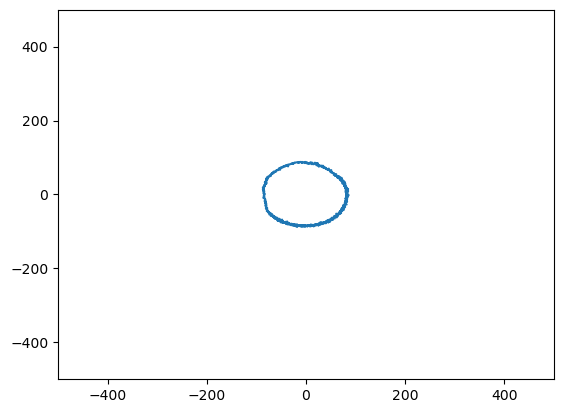

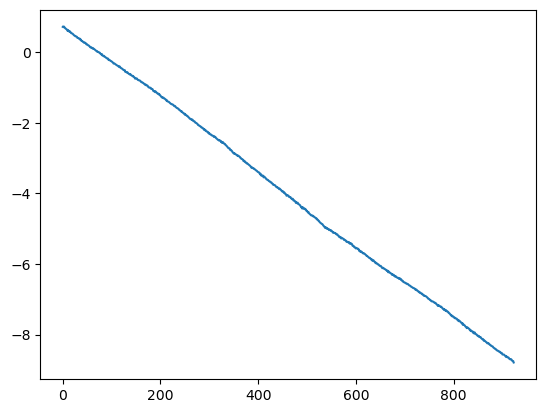

-0.19901717870655575


In [10]:
process("./videos3/0.2hz paraf.mp4")

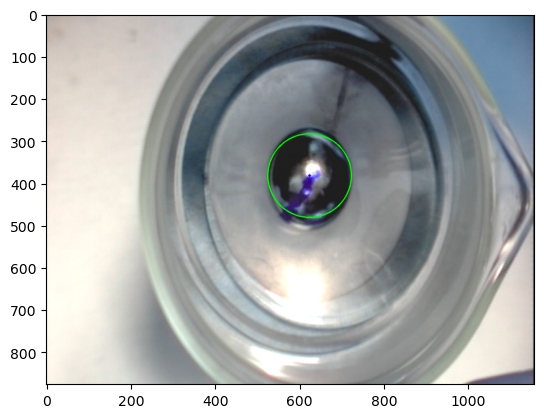

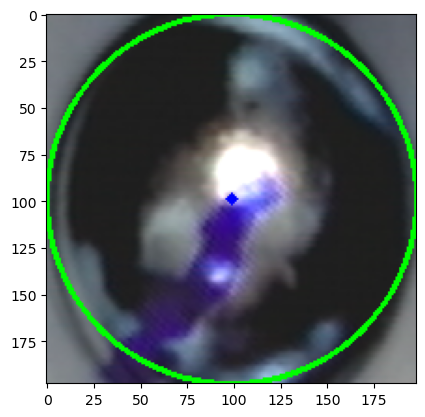

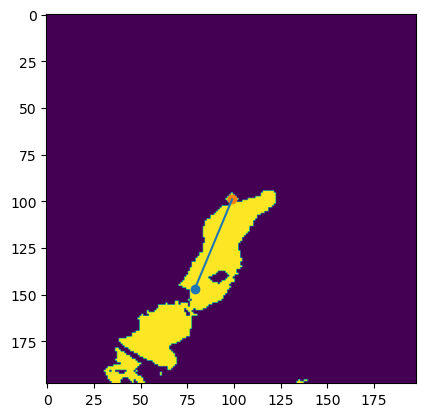

theta = -0.39479111969976155


In [3]:
# Read image. 
img = cv2.imread('1.png', cv2.IMREAD_COLOR) 

# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# Blur using 3 * 3 kernel. 
gray_blurred = cv2.blur(gray, (3, 3)) 
# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(gray_blurred,  
                   cv2.HOUGH_GRADIENT, 1, 70, param1 = 50, 
               param2 = 30, minRadius = 40, maxRadius = 100) 
  
# Draw circles that are detected. 
if detected_circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 
  
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
  
        # Draw the circumference of the circle. 
        cv2.circle(img, (a, b), r, (0, 255, 0), 2) 
  
        # Draw a small circle (of radius 1) to show the center. 
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
        plt.imshow(img)
        plt.show()


selected = img[b-r:b+r,a-r:a+r,:]
plt.imshow(img[b-r:b+r,a-r:a+r,:])
plt.show()

gamma = 1.6
blues = np.logical_and(selected[:,:,2] >= gamma*selected[:,:,0], selected[:,:,2] >= gamma*selected[:,:,1])
blues_center = np.round(np.mean(np.argwhere(blues),axis = 0)).astype(np.int64)
plt.imshow(blues)
center = np.array([selected.shape[0],selected.shape[1]])/2
plt.scatter(blues_center[1],blues_center[0])
plt.scatter(center[1],center[0])
plt.plot([center[1],blues_center[1]],[center[0],blues_center[0]])
plt.show()

theta = np.arctan((center[1]- blues_center[1])/(center[0]-blues_center[0]))
print(f"theta = {theta}")


In [5]:
videodata = skvideo.io.vread("./videos3/0.2hz paraf.mp4")  

In [7]:
del videodata

In [6]:
videodata.shape



(924, 1920, 1080, 3)

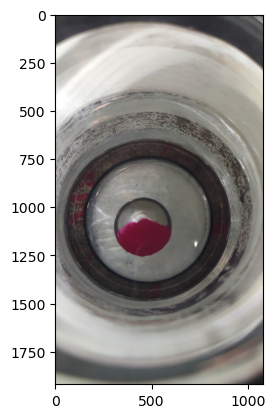

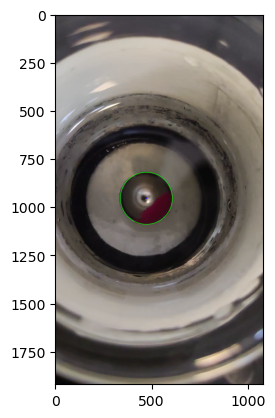

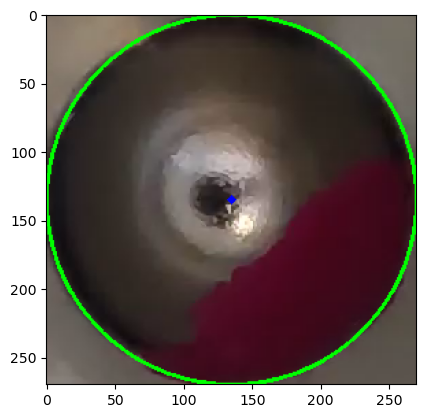

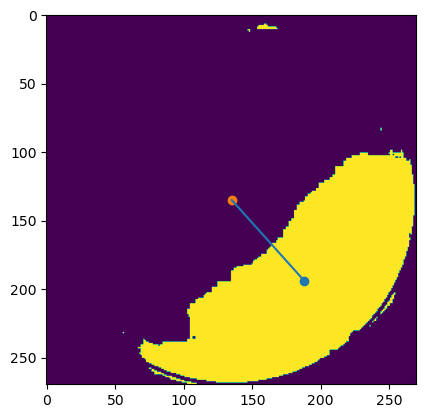

theta = 0.7318778949381333


41.93351449887411

In [5]:
# Read image. 

img = videodata[350].astype(np.uint8)
# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# Blur using 3 * 3 kernel. 
gray_blurred = cv2.blur(gray, (3, 3)) 
# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(gray_blurred,  
                   cv2.HOUGH_GRADIENT, 1, 70, param1 = 20, 
               param2 = 40, minRadius = 100, maxRadius = 200) 
  
# Draw circles that are detected. 
if detected_circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 
  
    pt =  detected_circles[0, 0] 
    a, b, r = pt[0], pt[1], pt[2] 

    # Draw the circumference of the circle. 
    cv2.circle(img, (a, b), r, (0, 255, 0), 2) 

    # Draw a small circle (of radius 1) to show the center. 
    cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
    plt.imshow(img)
    plt.show()




selected = img[b-r:b+r,a-r:a+r,:]
plt.imshow(img[b-r:b+r,a-r:a+r,:])
plt.show()

gamma = 1.5
blues = np.logical_and(selected[:,:,0] >= gamma*selected[:,:,2], selected[:,:,0] >= gamma*selected[:,:,1])
blues_center = np.round(np.mean(np.argwhere(blues),axis = 0)).astype(np.int64)
plt.imshow(blues)
center = np.array([selected.shape[0],selected.shape[1]])/2
plt.scatter(blues_center[1],blues_center[0])
plt.scatter(center[1],center[0])
plt.plot([center[1],blues_center[1]],[center[0],blues_center[0]])
plt.show()

vector = (blues_center - center)

theta = np.arctan(vector[1]/vector[0])
print(f"theta = {theta}")

np.rad2deg(theta)


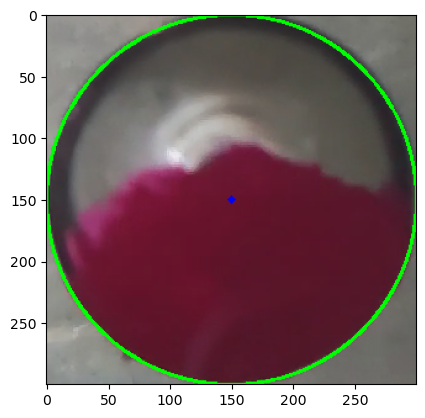

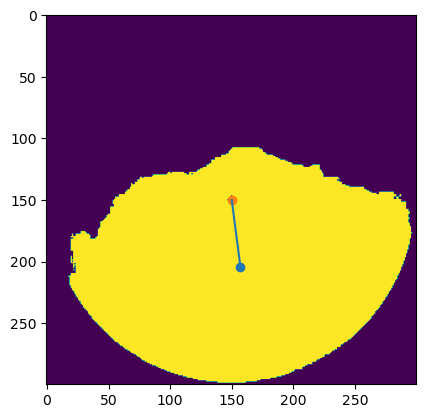

theta = 0.12891077168399143


7.386043151267269

In [41]:
datas = - np.array( [ -2.999170990139913,
-0.5929549086368324,
-0.8985210965912445,
-6.006045432691075,
-4.2614993887664365,
-1.9978398295048438,
-0.7024580902007408,

-1.0012276045362727,
-0.8024614028080743,
-0.19901717870655575,

-0.30322281143581953,
-4.997149699240423
])

fs = []
for file in filesnames:

    fs.append(float(file[10:-12]))


In [37]:
fs,datas

([3.0, 0.6, 0.9, 6.0, 4.0, 2.0, 0.7, 1.0, 0.8, 0.2, 0.3, 5.0],
 array([2.99917099, 0.59295491, 0.8985211 , 6.00604543, 4.26149939,
        1.99783983, 0.70245809, 1.0012276 , 0.8024614 , 0.19901718,
        5.30037251]))

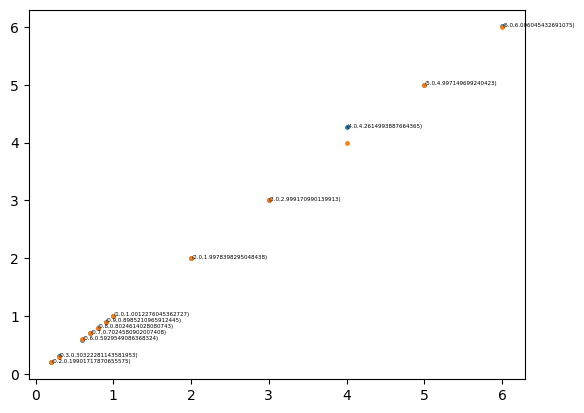

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(fs, datas,s=6)
ax.scatter(fs, fs,s=6)
for x,y in zip(fs,datas):
    ax.text(x,y,f"({x},{y})",fontsize= 4)

plt.savefig("fig.png",dpi = 1000)


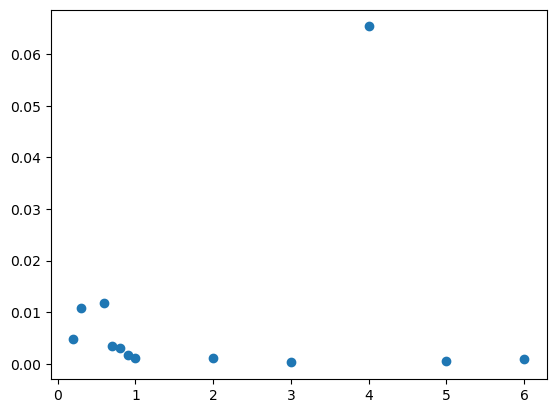

In [45]:
plt.scatter(fs, np.abs(fs - datas)/fs)

In [7]:
del videodata

./videos3/3hz paraf.mp4


100%|██████████| 444/444 [00:34<00:00, 12.99it/s]


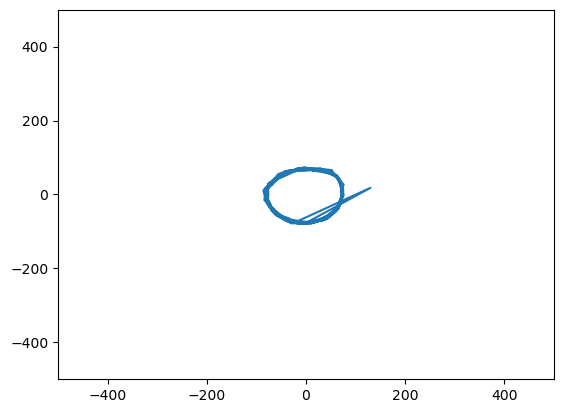

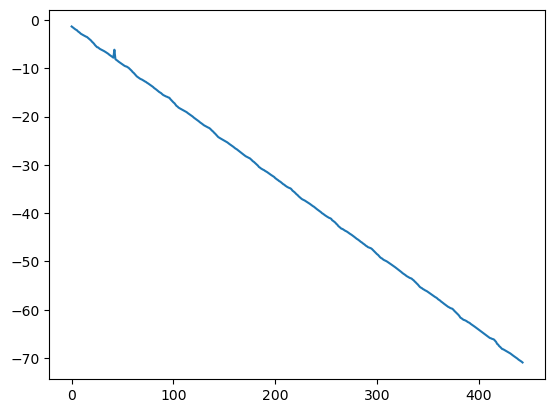

-2.999170990139913
./videos3/0.6hz paraf.mp4


  6%|▌         | 40/651 [00:03<00:48, 12.64it/s]/tmp/ipykernel_5430/2631212717.py:59: RuntimeWarning: divide by zero encountered in scalar divide
  theta = np.arctan(vector[1]/vector[0])
100%|██████████| 651/651 [00:46<00:00, 13.98it/s]


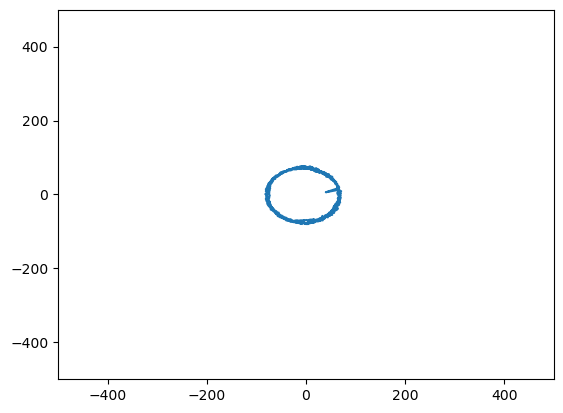

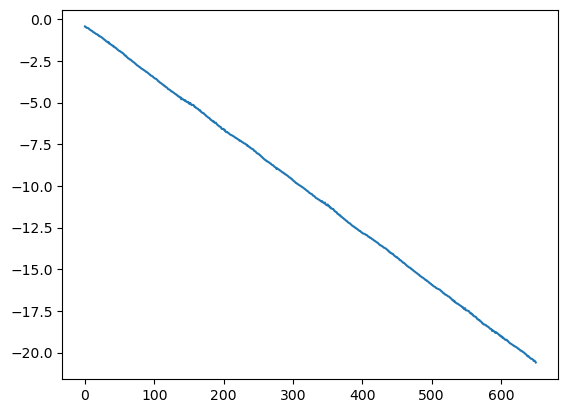

-0.5929549086368324
./videos3/0.9 hz paraf.mp4


100%|██████████| 397/397 [00:27<00:00, 14.46it/s]


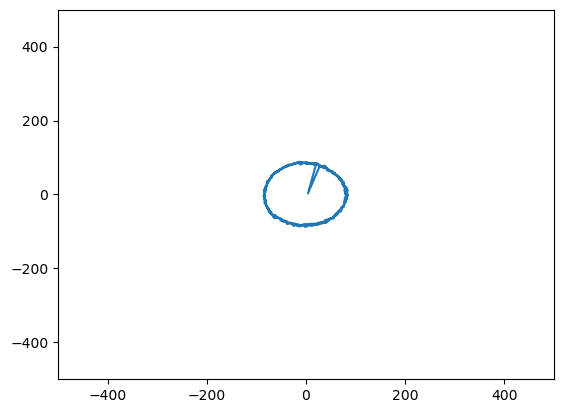

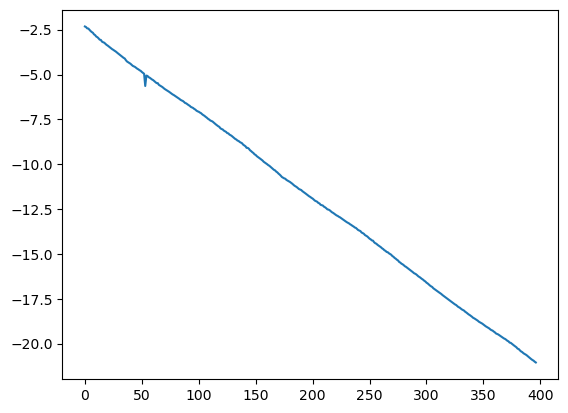

-0.8985210965912445
./videos3/6hz paraf.mp4


100%|██████████| 450/450 [00:41<00:00, 10.91it/s]


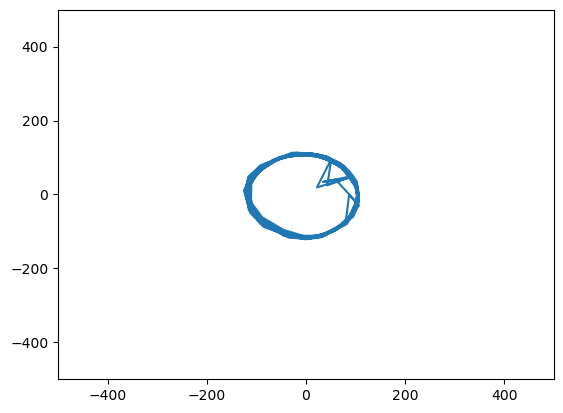

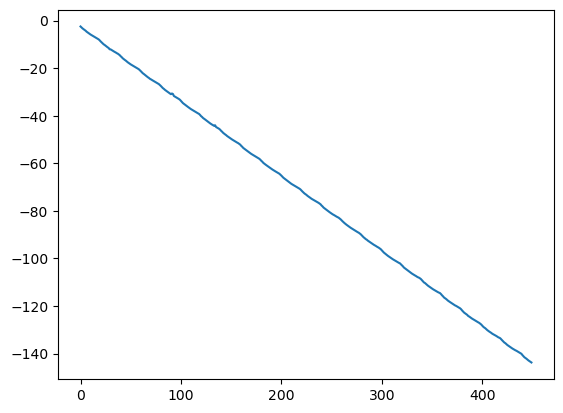

-6.006045432691075
./videos3/4hz paraf.mp4


  1%|          | 6/761 [00:00<00:49, 15.16it/s]/tmp/ipykernel_5430/2631212717.py:59: RuntimeWarning: invalid value encountered in scalar divide
  theta = np.arctan(vector[1]/vector[0])
100%|██████████| 761/761 [00:55<00:00, 13.72it/s]


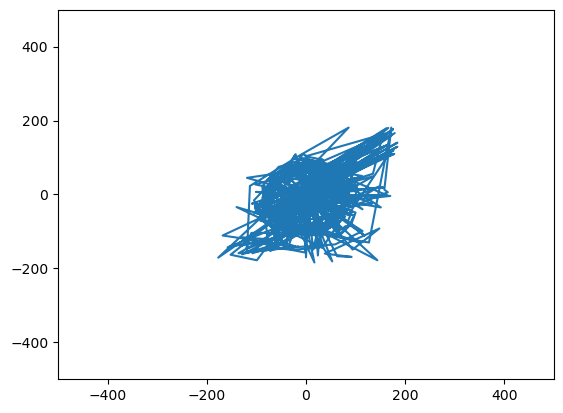

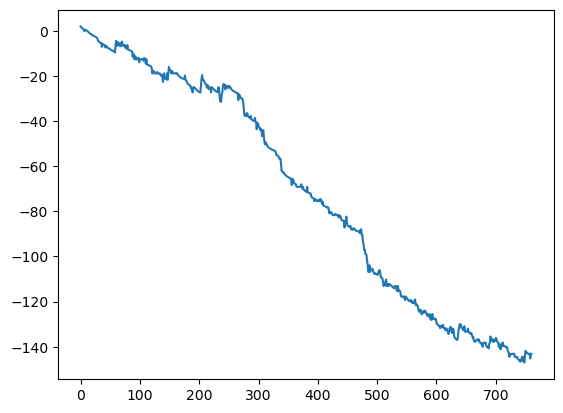

-4.2614993887664365
./videos3/2hz paraf.mp4


100%|██████████| 484/484 [00:31<00:00, 15.40it/s]


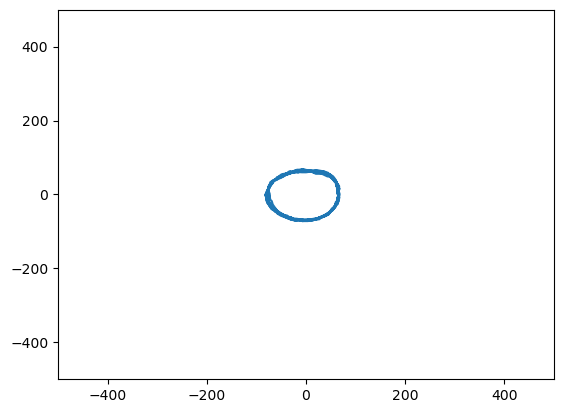

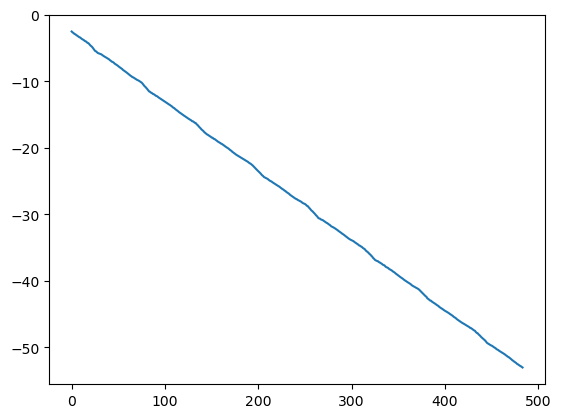

-1.9978398295048438
./videos3/0.7 hz paraf.mp4


100%|██████████| 571/571 [00:35<00:00, 15.90it/s]


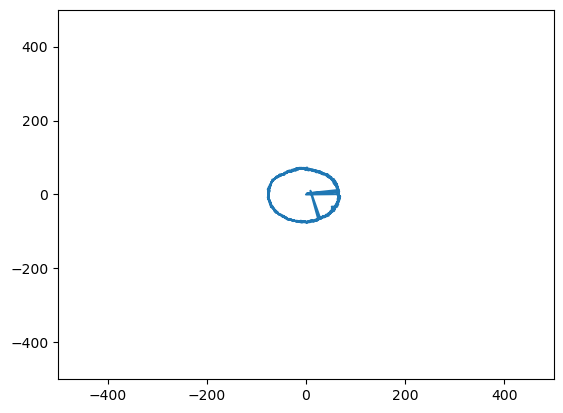

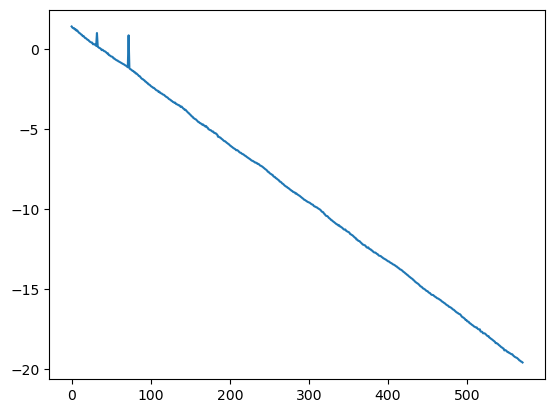

-0.7024580902007408
./videos3/1 hz paraf.mp4


100%|██████████| 389/389 [00:24<00:00, 16.17it/s]


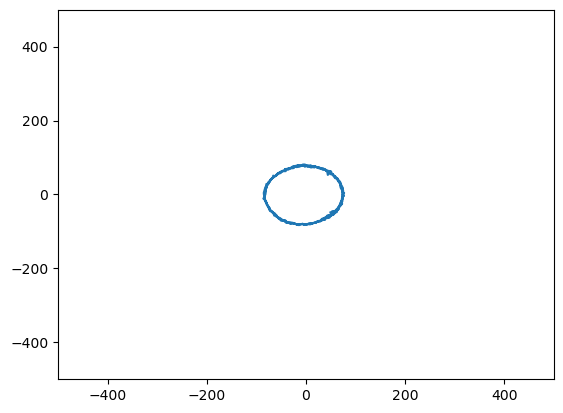

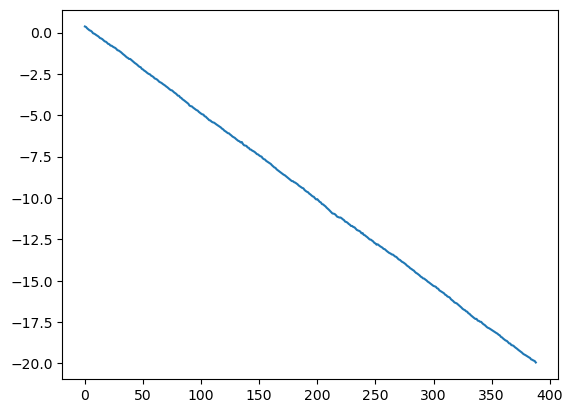

-1.0012276045362727
./videos3/0.8 hz paraf.mp4


100%|██████████| 425/425 [00:26<00:00, 15.86it/s]


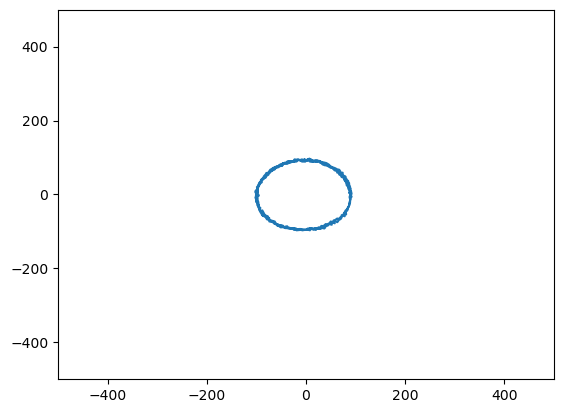

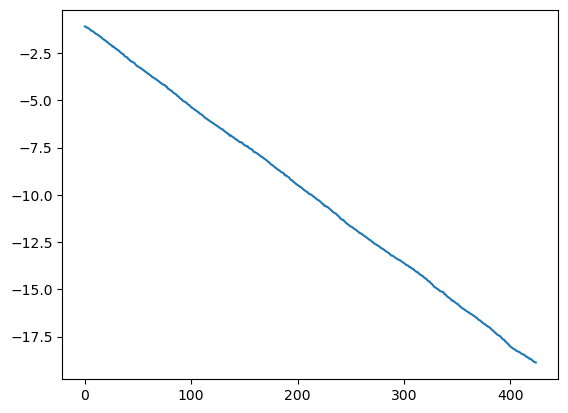

-0.8024614028080743
./videos3/0.2hz paraf.mp4


100%|██████████| 924/924 [01:05<00:00, 14.01it/s]


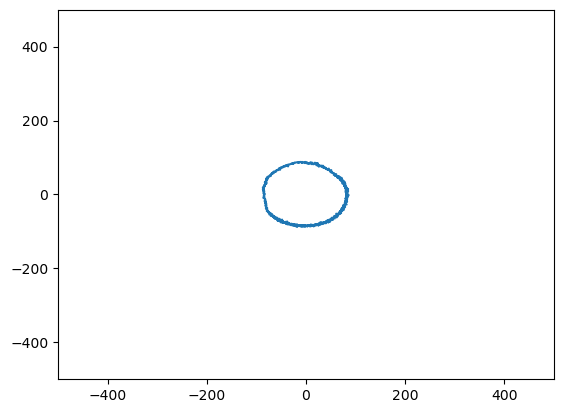

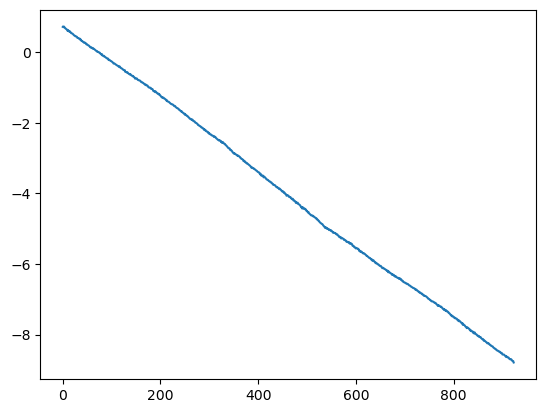

-0.19901717870655575
./videos3/0.3 hz paraf.mp4


100%|██████████| 722/722 [00:51<00:00, 14.01it/s]


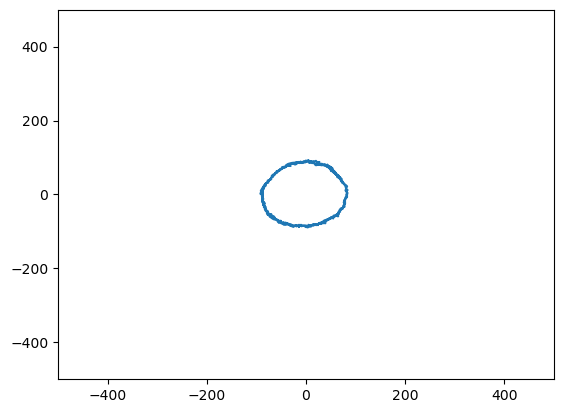

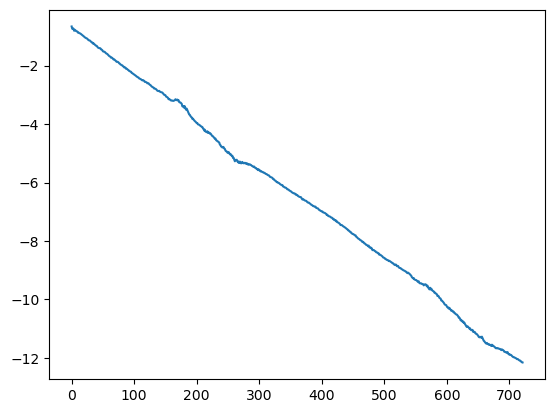

-0.30322281143581953
./videos3/5hz paraf.mp4


100%|██████████| 434/434 [00:34<00:00, 12.71it/s]


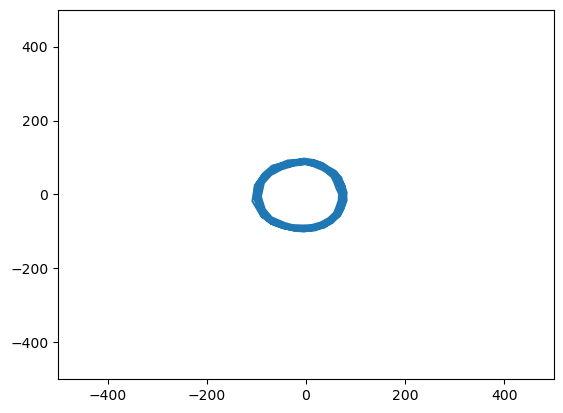

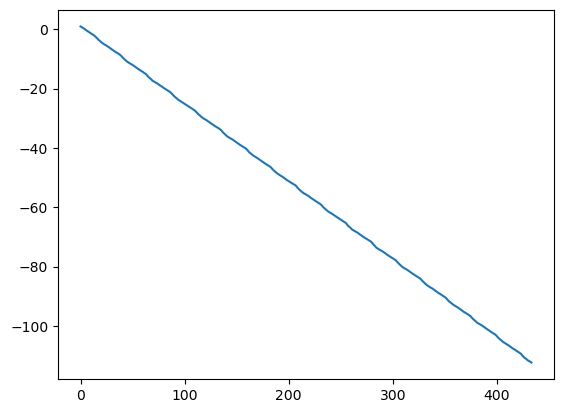

-4.997149699240423


In [11]:
filesnames = glob.glob("./videos3/*.mp4")
datas = []
for filename in filesnames: 
    print(filename)
    process(filename)

 63%|██████▎   | 258/409 [00:52<00:27,  5.40it/s]/tmp/ipykernel_29346/2631212717.py:42: RuntimeWarning: overflow encountered in scalar subtract
  selected = img[b-r:b+r,a-r:a+r,:]
/home/alireza-astane/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/alireza-astane/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/tmp/ipykernel_29346/2631212717.py:48: RuntimeWarning: invalid value encountered in cast
  blues_center = np.round(np.mean(np.argwhere(blues),axis = 0)).astype(np.int64)
100%|██████████| 409/409 [01:18<00:00,  5.19it/s]


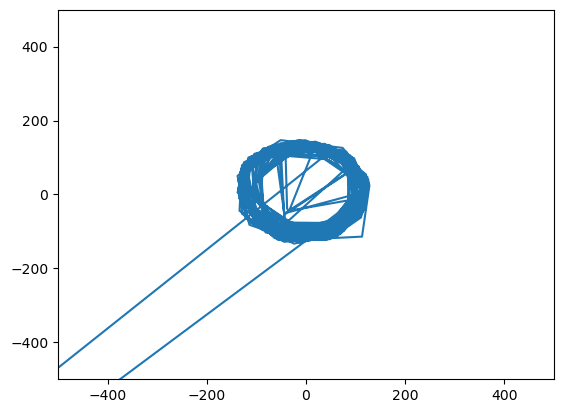

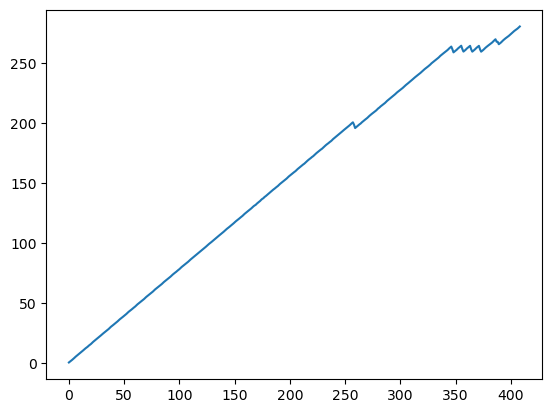

13.654001126910574


In [46]:
process("./videos2/14.9hz.mp4")

100%|██████████| 359/359 [01:30<00:00,  3.99it/s]


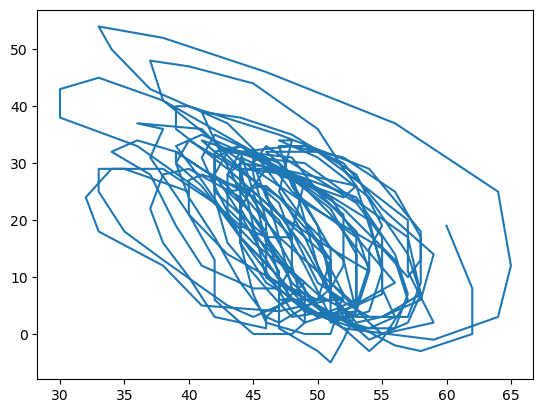

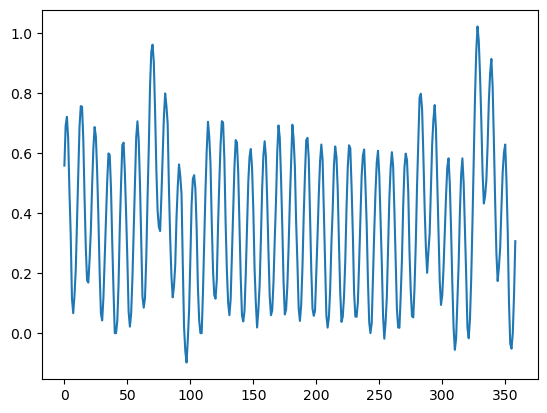

-0.00018936645125891297


In [18]:
process("./videos2/10.7hz.mp4")

100%|██████████| 369/369 [03:33<00:00,  1.73it/s]


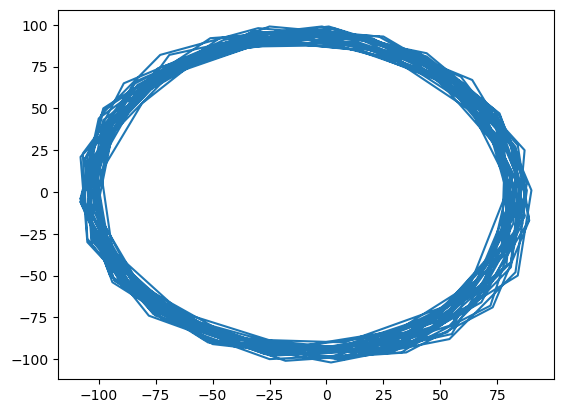

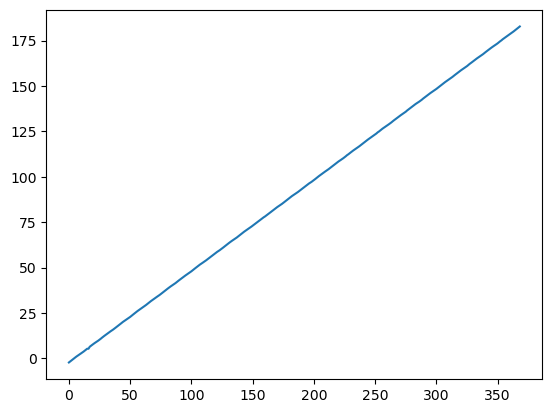

9.59352116780906


In [17]:
process("./videos2/9.6hz.mp4")

In [1]:
def process(filename):
    videodata = video_to_numpy(filename)
    rads = np.zeros(videodata.shape[0])
    data = np.zeros((videodata.shape[0],2))

    for i in tqdm(range(videodata.shape[0])):
        # print(i)
        # Read image. 
        img = videodata[i].astype(np.uint8)

        # Convert to grayscale. 
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
        
        # Blur using 3 * 3 kernel. 
        gray_blurred = cv2.blur(gray, (3, 3)) 
        # Apply Hough transform on the blurred image. 
        # detected_circles = cv2.HoughCircles(gray_blurred,  
        #                 cv2.HOUGH_GRADIENT, 1, 70, param1 = 60, 
        #             param2 = 30, minRadius = 70, maxRadius = 300) 
        detected_circles = cv2.HoughCircles(gray_blurred,  
                        cv2.HOUGH_GRADIENT, 1, 70, param1 = 20,   #60 , 30
                    param2 = 40, minRadius = 100, maxRadius = 200) 
        
        # Draw circles that are detected. 
        if detected_circles is not None: 
        
            # Convert the circle parameters a, b and r to integers. 
            detected_circles = np.uint16(np.around(detected_circles)) 
        
            pt =  detected_circles[0, 0] 
            a, b, r = pt[0], pt[1], pt[2] 

            # Draw the circumference of the circle. 
            cv2.circle(img, (a, b), r, (0, 255, 0), 2) 

            # Draw a small circle (of radius 1) to show the center. 
            cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
            # plt.imshow(img)
            # plt.show()


            selected = img[b-r:b+r,a-r:a+r,:]
            # plt.imshow(img[b-r:b+r,a-r:a+r,:])
            # plt.show()

            gamma = 1.5
            blues = np.logical_and(selected[:,:,2] >= gamma*selected[:,:,1], selected[:,:,2] >= gamma*selected[:,:,0])
            blues_center = np.round(np.mean(np.argwhere(blues),axis = 0)).astype(np.int64)
            # plt.imshow(blues)
            center = np.array([selected.shape[0],selected.shape[1]])/2

            # plt.scatter(blues_center[1],blues_center[0])
            # plt.scatter(center[1],center[0])
            # plt.plot([center[1],blues_center[1]],[center[0],blues_center[0]])
            # plt.show()

            vector = (blues_center - center)

            theta = np.arctan(vector[1]/vector[0])

            # print(f"theta = {theta}")
            # print(f"degree = {np.rad2deg(theta)}")

            data[i] = vector
        else:
            print("error")
    plt.xlim((-500,500))
    plt.ylim((-500,500))

    plt.plot(data[:,0],data[:,1])
    plt.show()

    plt.plot(np.arange(data.shape[0]),np.unwrap(np.angle(data[:,0] + data[:,1] * 1j))) 
    plt.show()

    print(scipy.stats.linregress(np.arange(data.shape[0]),np.unwrap(np.angle(data[:,0] + data[:,1] * 1j)))[0] * 120/ (2*np.pi))



    del videodata




In [2]:
import glob
from tqdm import tqdm 

In [5]:
# filesnames = glob.glob("./videos/*.mp4")
filesnames = glob.glob("./videos2/*.mp4")

In [ ]:
9.6 , 10.7 , 14.9

In [26]:
filesnames

['./videos2/10.2hz.mp4',
 './videos2/10.4hz.mp4',
 './videos2/9.9hz.mp4',
 './videos2/14.7hz.mp4',
 './videos2/8hz_1.mp4',
 './videos2/9.1hz.mp4',
 './videos2/14.9hz.mp4',
 './videos2/14.8hz.mp4',
 './videos2/7hz_1.mp4',
 './videos2/9.5hz.mp4',
 './videos2/9.3hz.mp4',
 './videos2/9hz_1.mp4',
 './videos2/10.3hz.mp4',
 './videos2/10hz_1.mp4',
 './videos2/10.1hz.mp4',
 './videos2/9.7hz.mp4',
 './videos2/10.7hz.mp4',
 './videos2/9.4hz.mp4',
 './videos2/9.8hz.mp4',
 './videos2/9.6hz.mp4',
 './videos2/9.2hz.mp4']

./videos2/10.2hz.mp4


 96%|█████████▌| 344/358 [00:30<00:01, 10.60it/s]/tmp/ipykernel_29346/601367198.py:59: RuntimeWarning: divide by zero encountered in scalar divide
  theta = np.arctan(vector[1]/vector[0])
100%|██████████| 358/358 [00:31<00:00, 11.22it/s]


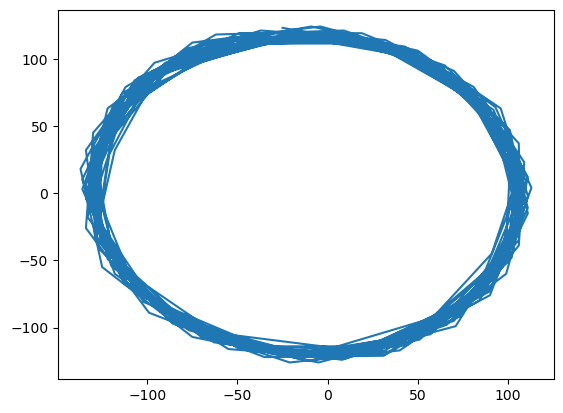

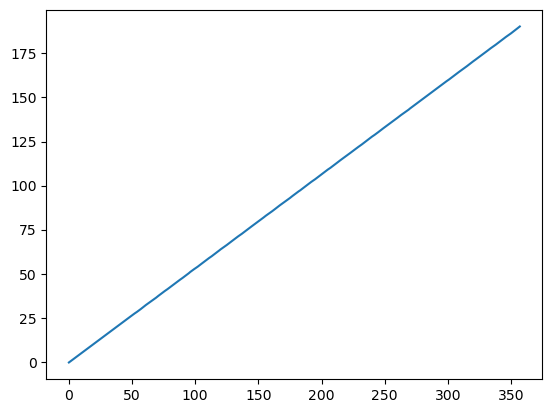

10.192089223036989
./videos2/10.4hz.mp4


100%|██████████| 360/360 [00:29<00:00, 12.14it/s]


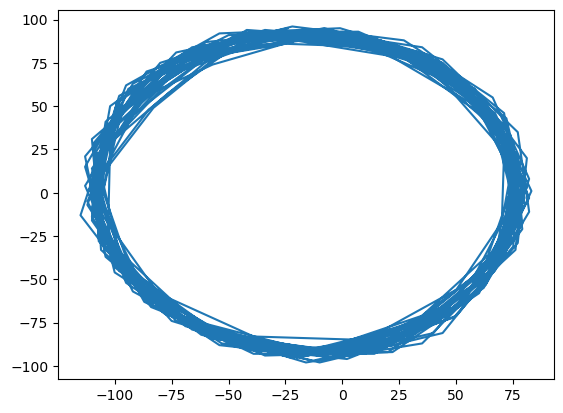

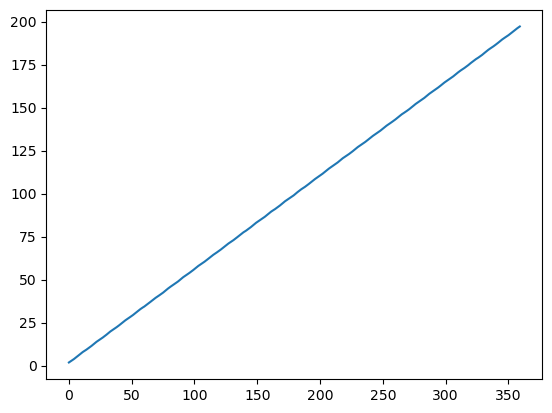

10.39145102141959
./videos2/9.9hz.mp4


100%|██████████| 398/398 [00:34<00:00, 11.56it/s]


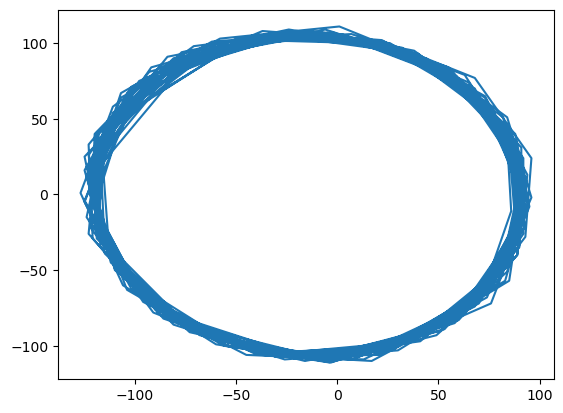

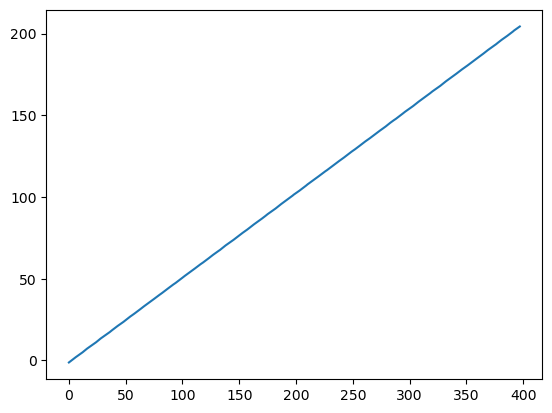

9.892665089111745
./videos2/14.7hz.mp4


  1%|          | 2/384 [00:00<00:31, 12.10it/s]

error


100%|██████████| 384/384 [00:26<00:00, 14.61it/s]


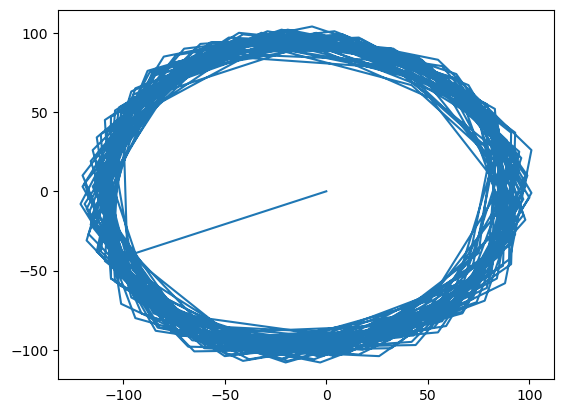

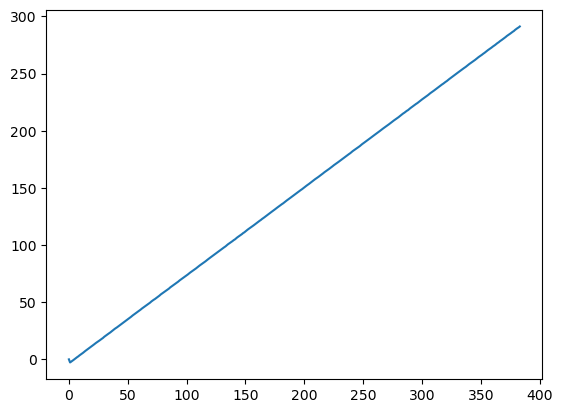

14.691898626853716
./videos2/8hz_1.mp4


100%|██████████| 412/412 [00:35<00:00, 11.77it/s]


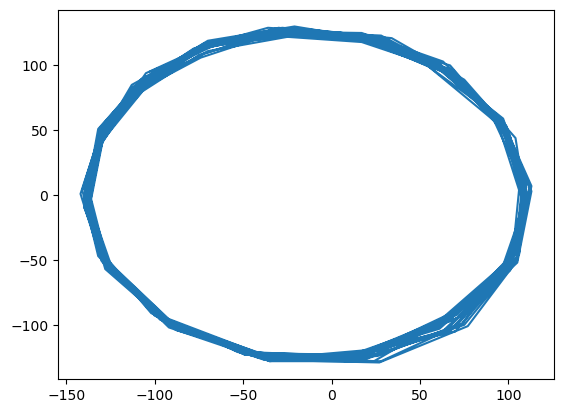

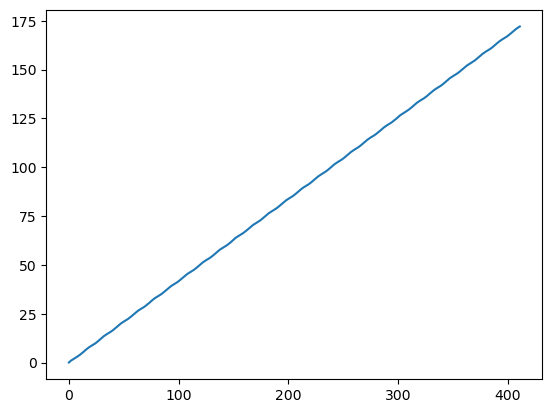

7.993402885530473
./videos2/9.1hz.mp4


100%|██████████| 433/433 [00:37<00:00, 11.70it/s]


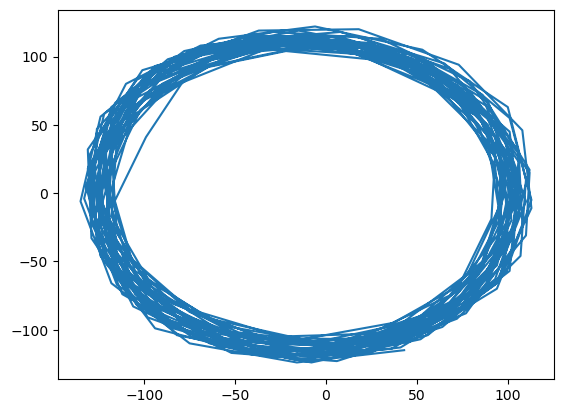

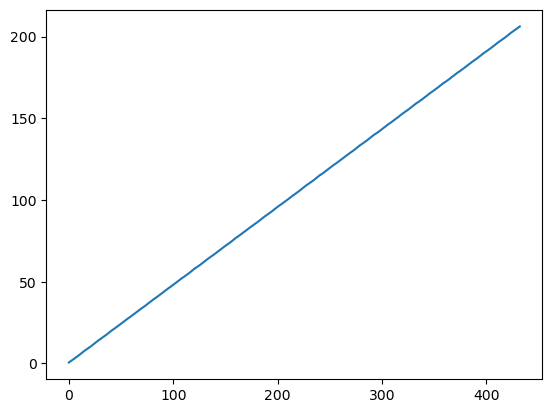

9.091439316512067
./videos2/14.9hz.mp4


 34%|███▎      | 138/409 [00:09<00:18, 14.94it/s]

error
error


 35%|███▍      | 142/409 [00:09<00:18, 14.66it/s]

error
error
error


 36%|███▌      | 146/409 [00:09<00:17, 15.27it/s]

error
error
error
error


 37%|███▋      | 150/409 [00:10<00:17, 14.75it/s]

error
error
error
error


 37%|███▋      | 152/409 [00:10<00:17, 14.53it/s]

error
error
error


 38%|███▊      | 156/409 [00:10<00:16, 14.98it/s]

error
error
error
error


 39%|███▉      | 160/409 [00:10<00:16, 14.89it/s]

error
error
error


 40%|███▉      | 162/409 [00:11<00:17, 13.81it/s]

error
error
error


 41%|████      | 166/409 [00:11<00:16, 14.37it/s]

error
error
error
error


 42%|████▏     | 170/409 [00:11<00:16, 14.68it/s]

error
error
error
error


 43%|████▎     | 174/409 [00:11<00:15, 15.32it/s]

error
error
error
error


 44%|████▎     | 178/409 [00:12<00:14, 15.75it/s]

error
error
error
error


 44%|████▍     | 182/409 [00:12<00:14, 15.72it/s]

error
error
error
error


 45%|████▌     | 186/409 [00:12<00:14, 15.25it/s]

error
error
error
error


 46%|████▋     | 190/409 [00:12<00:15, 14.32it/s]

error
error
error


 48%|████▊     | 196/409 [00:13<00:14, 15.10it/s]

error
error
error
error


 49%|████▉     | 200/409 [00:13<00:13, 15.23it/s]

error
error
error
error


 50%|████▉     | 204/409 [00:13<00:13, 15.38it/s]

error
error
error


 51%|█████     | 208/409 [00:14<00:13, 15.38it/s]

error
error
error


 51%|█████▏    | 210/409 [00:14<00:13, 15.28it/s]

error
error
error


 52%|█████▏    | 214/409 [00:14<00:13, 14.76it/s]

error
error
error


 53%|█████▎    | 218/409 [00:14<00:12, 15.27it/s]

error
error


 54%|█████▍    | 220/409 [00:14<00:12, 14.69it/s]

error
error
error


 55%|█████▍    | 224/409 [00:15<00:12, 14.73it/s]

error
error
error


 56%|█████▌    | 228/409 [00:15<00:11, 15.86it/s]

error
error
error
error


 57%|█████▋    | 232/409 [00:15<00:10, 16.56it/s]

error
error
error


 58%|█████▊    | 238/409 [00:16<00:10, 16.40it/s]

error
error


 60%|█████▉    | 244/409 [00:16<00:10, 16.46it/s]

error
error
error


 61%|██████    | 248/409 [00:16<00:10, 15.08it/s]

error


 62%|██████▏   | 252/409 [00:16<00:10, 15.61it/s]

error
error


 63%|██████▎   | 258/409 [00:17<00:08, 16.82it/s]

error
error
error
error


 64%|██████▍   | 262/409 [00:17<00:08, 17.16it/s]

error
error
error
error


 65%|██████▌   | 266/409 [00:17<00:08, 17.07it/s]

error
error
error
error


 66%|██████▌   | 270/409 [00:17<00:08, 16.72it/s]

error
error
error


 67%|██████▋   | 274/409 [00:18<00:08, 15.76it/s]

error
error
error
error


 68%|██████▊   | 278/409 [00:18<00:08, 15.51it/s]

error
error
error
error


 69%|██████▉   | 282/409 [00:18<00:07, 15.97it/s]

error
error
error
error


 70%|██████▉   | 286/409 [00:19<00:07, 16.23it/s]

error
error
error
error


 71%|███████   | 290/409 [00:19<00:07, 16.83it/s]

error
error
error


 72%|███████▏  | 294/409 [00:19<00:06, 17.49it/s]

error
error
error
error


 73%|███████▎  | 298/409 [00:19<00:06, 16.77it/s]

error
error
error
error


 74%|███████▍  | 302/409 [00:19<00:06, 16.23it/s]

error
error
error


 75%|███████▌  | 308/409 [00:20<00:06, 16.61it/s]

error
error
error
error


 76%|███████▋  | 312/409 [00:20<00:06, 15.86it/s]

error
error
error
error


 77%|███████▋  | 316/409 [00:20<00:06, 14.48it/s]

error
error
error


 78%|███████▊  | 320/409 [00:21<00:06, 13.95it/s]

error
error
error


 79%|███████▊  | 322/409 [00:21<00:06, 13.88it/s]

error
error


 80%|███████▉  | 326/409 [00:21<00:06, 12.23it/s]

error
error
error


 81%|████████  | 330/409 [00:21<00:05, 13.50it/s]

error
error


 81%|████████  | 332/409 [00:22<00:06, 12.72it/s]

error
error


 82%|████████▏ | 336/409 [00:22<00:05, 13.81it/s]

error
error


 83%|████████▎ | 338/409 [00:22<00:05, 12.37it/s]

error
error
error


 84%|████████▎ | 342/409 [00:22<00:04, 13.76it/s]

error
error
error


 85%|████████▍ | 346/409 [00:23<00:04, 14.35it/s]

error
error
error
error


 85%|████████▌ | 348/409 [00:23<00:04, 13.90it/s]

error
error
error


 86%|████████▌ | 352/409 [00:23<00:04, 13.07it/s]

error
error
error


 87%|████████▋ | 356/409 [00:23<00:03, 13.39it/s]

error


 88%|████████▊ | 360/409 [00:24<00:03, 13.56it/s]

error
error
error
error


 89%|████████▊ | 362/409 [00:24<00:03, 13.76it/s]

error
error
error


 89%|████████▉ | 366/409 [00:24<00:03, 13.51it/s]

error
error
error


 90%|████████▉ | 368/409 [00:24<00:03, 13.43it/s]

error
error
error


 91%|█████████ | 372/409 [00:25<00:02, 13.63it/s]

error
error
error
error


 92%|█████████▏| 376/409 [00:25<00:02, 13.69it/s]

error
error
error


 93%|█████████▎| 380/409 [00:25<00:02, 14.12it/s]

error
error
error
error


 93%|█████████▎| 382/409 [00:25<00:01, 14.00it/s]

error
error
error


 94%|█████████▍| 386/409 [00:26<00:01, 13.74it/s]

error
error
error
error


 95%|█████████▌| 390/409 [00:26<00:01, 15.00it/s]

error
error
error
error


 96%|█████████▋| 394/409 [00:26<00:01, 13.58it/s]

error
error
error


 97%|█████████▋| 398/409 [00:27<00:00, 12.98it/s]

error
error
error


 98%|█████████▊| 400/409 [00:27<00:00, 13.19it/s]

error
error
error


 99%|█████████▉| 404/409 [00:27<00:00, 14.21it/s]

error
error
error


100%|█████████▉| 408/409 [00:27<00:00, 13.24it/s]

error
error
error


100%|██████████| 409/409 [00:27<00:00, 14.69it/s]


error


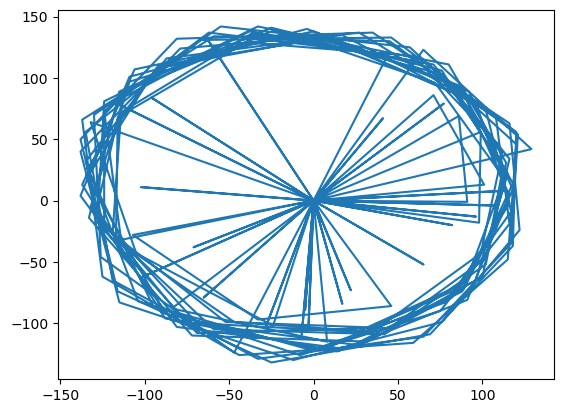

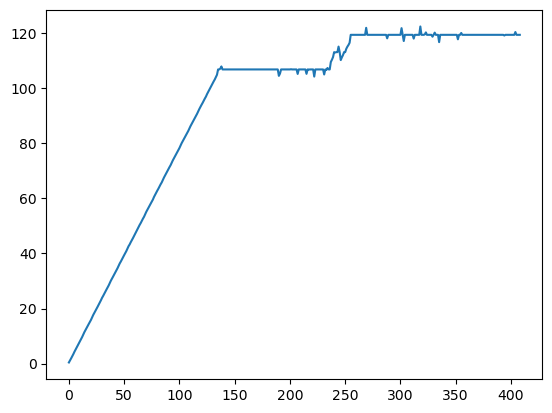

4.73492113574138
./videos2/14.8hz.mp4


100%|██████████| 387/387 [00:28<00:00, 13.82it/s]


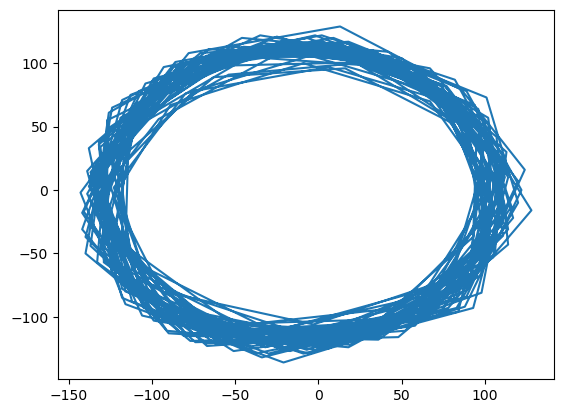

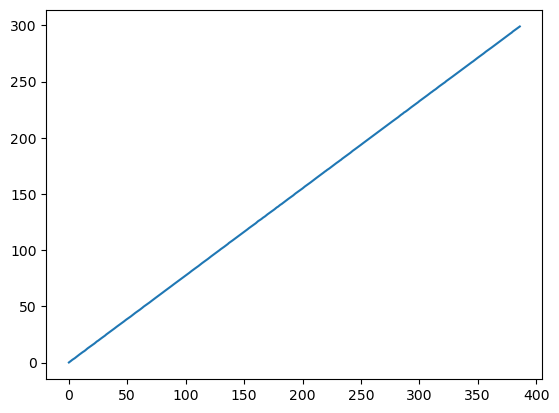

14.791966218779162
./videos2/7hz_1.mp4


100%|██████████| 447/447 [00:40<00:00, 10.93it/s]


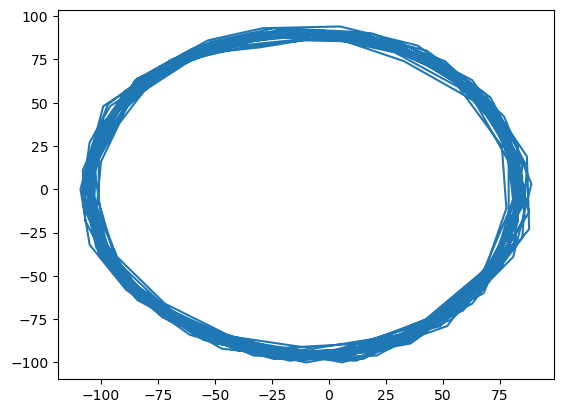

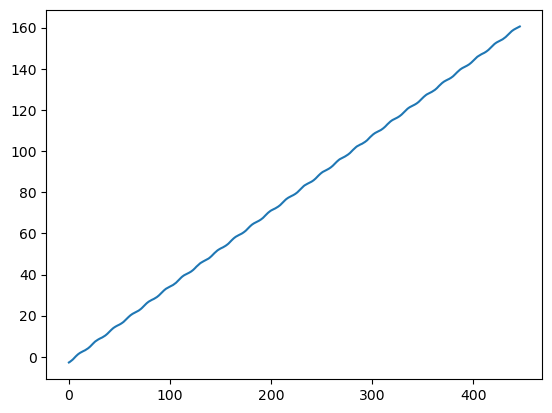

6.995565716902398
./videos2/9.5hz.mp4


100%|██████████| 363/363 [00:24<00:00, 15.10it/s]


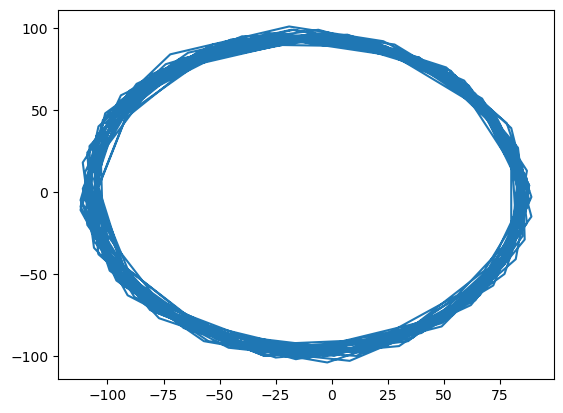

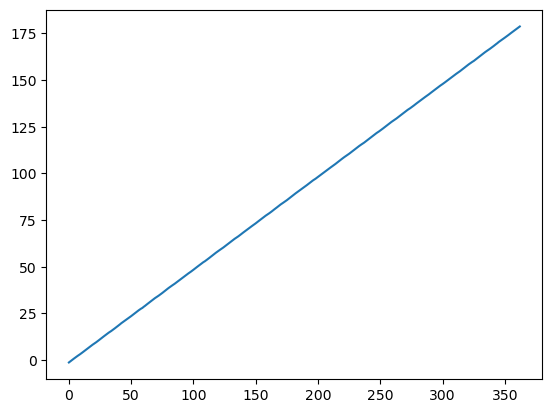

9.493334570261663
./videos2/9.3hz.mp4


100%|██████████| 429/429 [00:24<00:00, 17.17it/s]


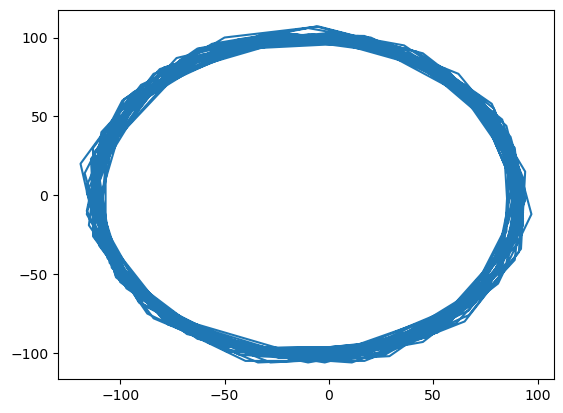

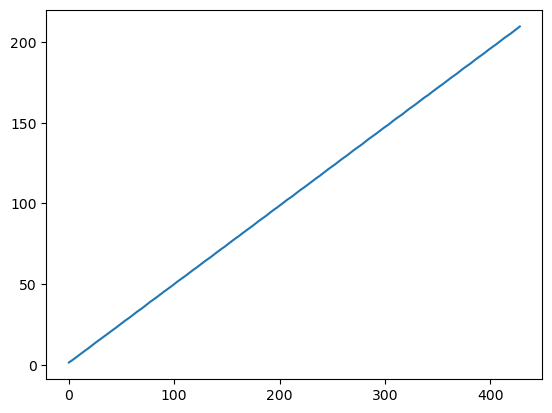

9.293137692199142
./videos2/9hz_1.mp4


100%|██████████| 402/402 [00:25<00:00, 15.78it/s]


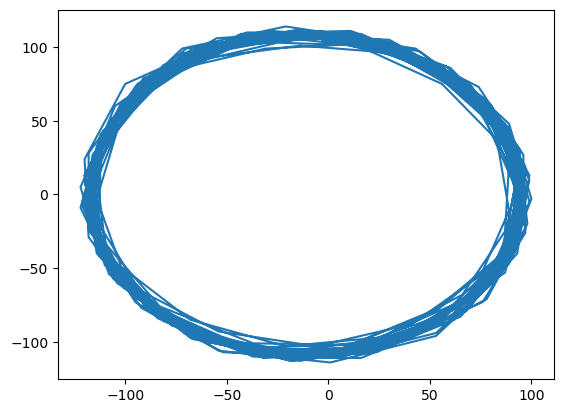

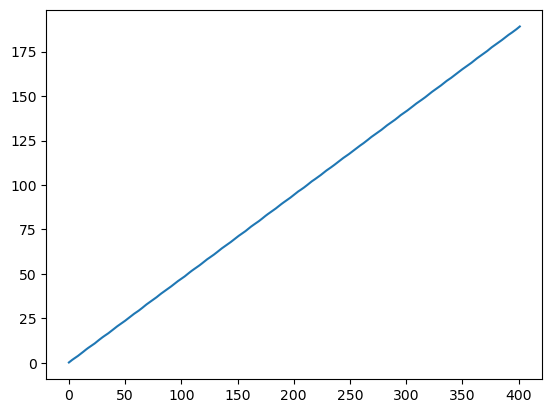

8.992356289406427
./videos2/10.3hz.mp4


100%|██████████| 478/478 [00:29<00:00, 16.21it/s]


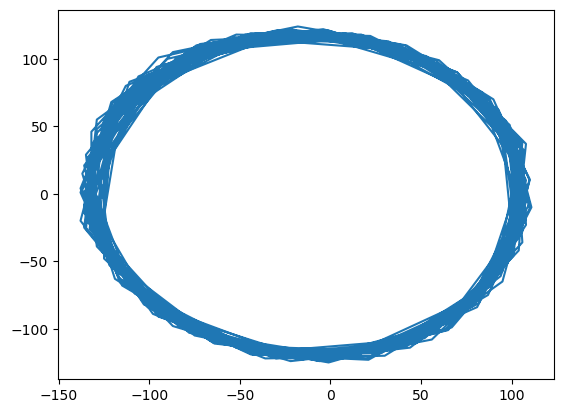

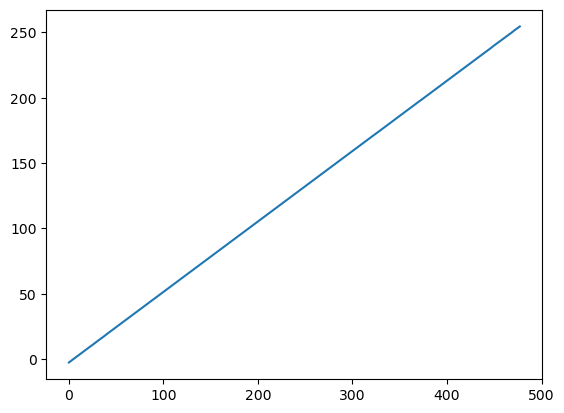

10.292264429196498
./videos2/10hz_1.mp4


100%|██████████| 391/391 [00:25<00:00, 15.57it/s]


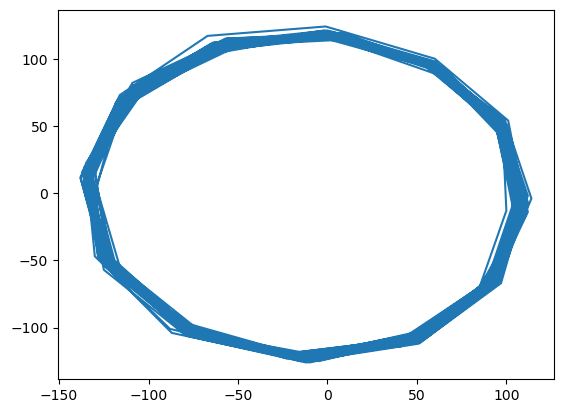

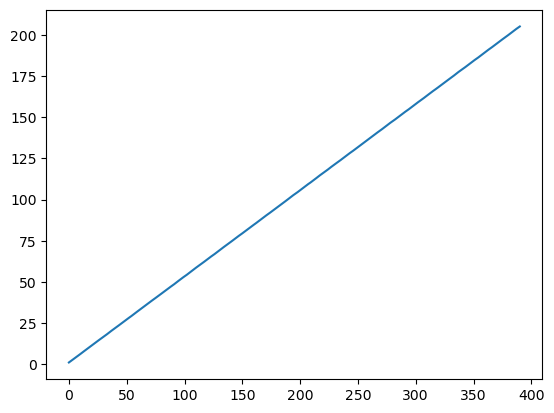

9.993891825687184
./videos2/10.1hz.mp4


100%|██████████| 344/344 [00:21<00:00, 16.08it/s]


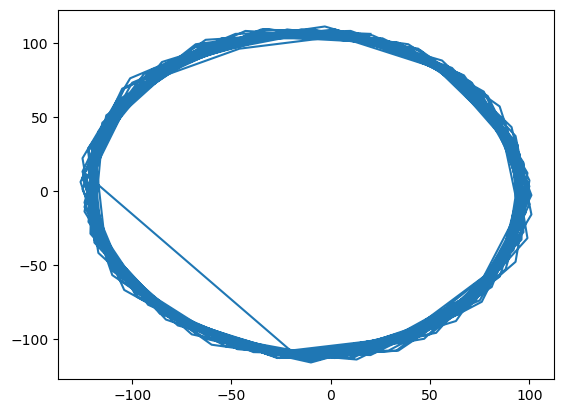

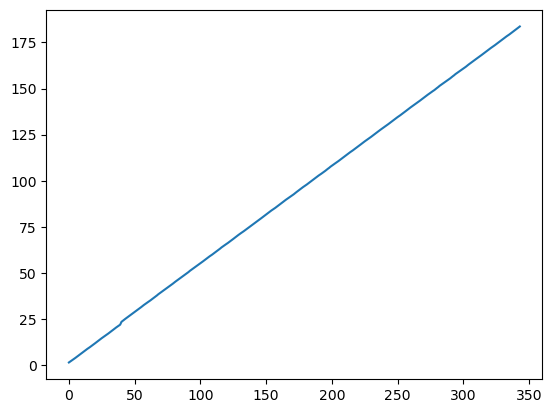

10.128634284835432
./videos2/9.7hz.mp4


100%|██████████| 376/376 [00:36<00:00, 10.30it/s]


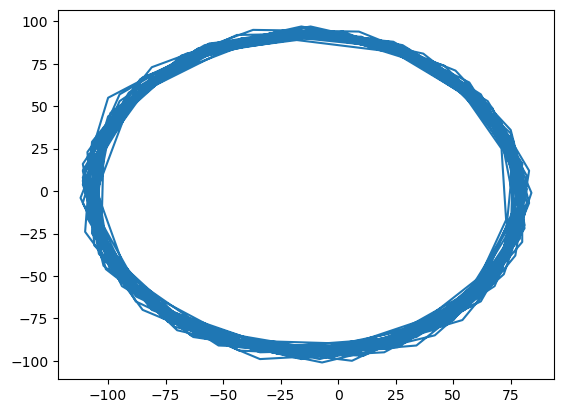

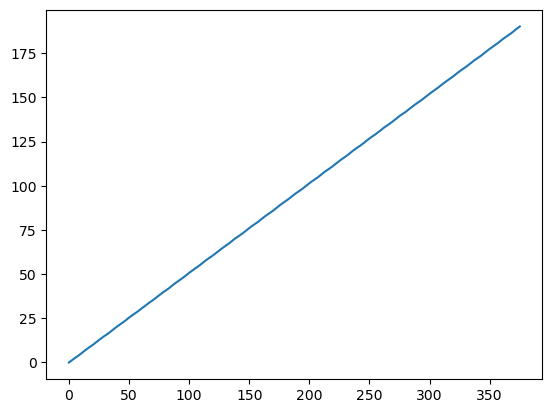

9.693060494225074
./videos2/10.7hz.mp4


  1%|          | 2/359 [00:00<00:30, 11.69it/s]/tmp/ipykernel_29346/601367198.py:59: RuntimeWarning: invalid value encountered in scalar divide
  theta = np.arctan(vector[1]/vector[0])
100%|██████████| 359/359 [00:26<00:00, 13.52it/s]


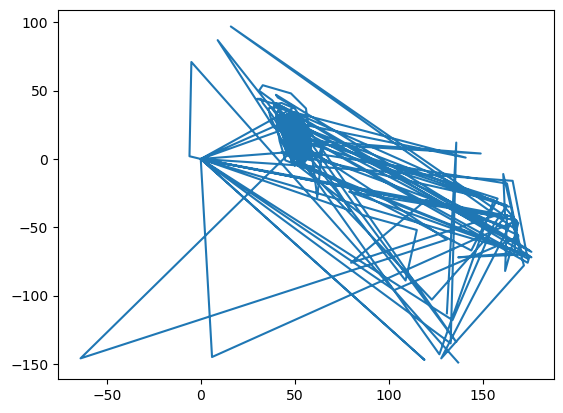

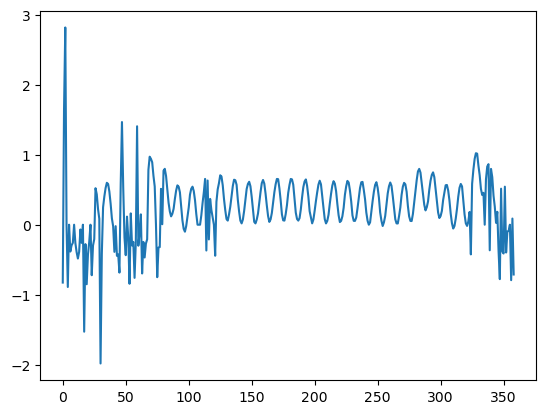

0.017299750481006324
./videos2/9.4hz.mp4


100%|██████████| 419/419 [00:31<00:00, 13.10it/s]


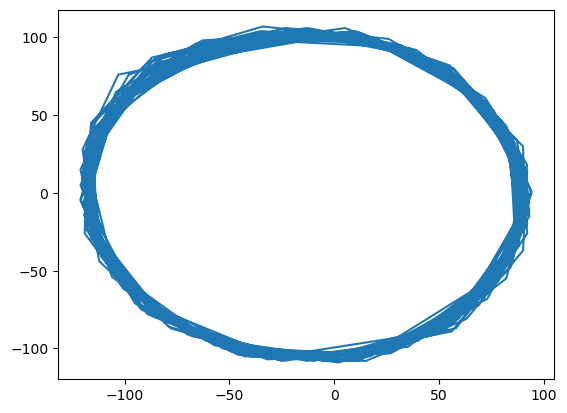

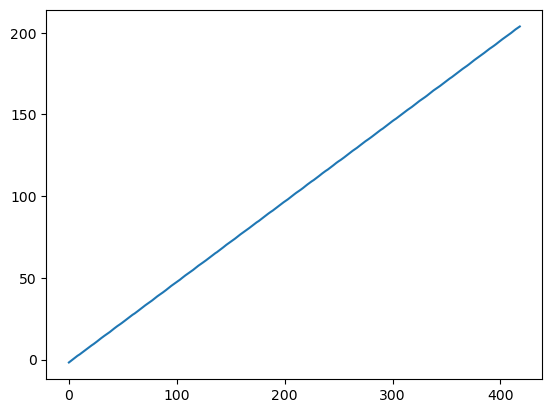

9.393022692484958
./videos2/9.8hz.mp4


100%|██████████| 404/404 [00:37<00:00, 10.74it/s]


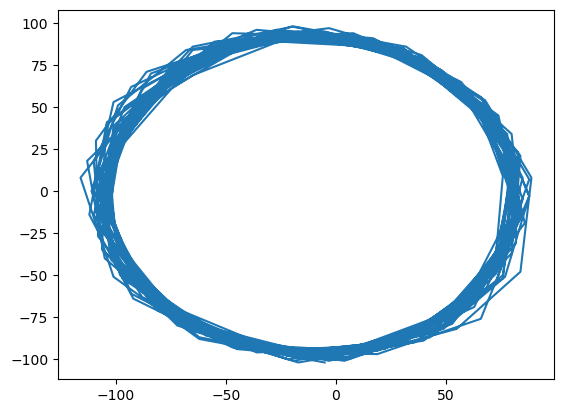

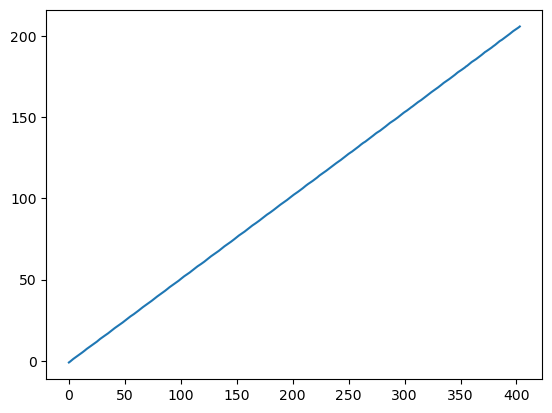

9.794067231501195
./videos2/9.6hz.mp4


 21%|██▏       | 79/369 [00:07<00:20, 14.18it/s]/tmp/ipykernel_29346/601367198.py:42: RuntimeWarning: overflow encountered in scalar subtract
  selected = img[b-r:b+r,a-r:a+r,:]
/home/alireza-astane/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/alireza-astane/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/tmp/ipykernel_29346/601367198.py:48: RuntimeWarning: invalid value encountered in cast
  blues_center = np.round(np.mean(np.argwhere(blues),axis = 0)).astype(np.int64)
100%|██████████| 369/369 [00:30<00:00, 12.24it/s]


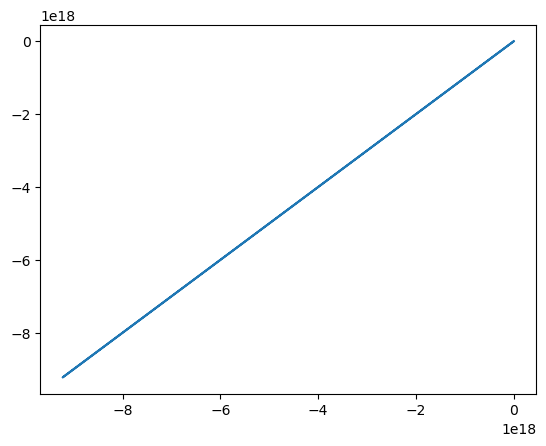

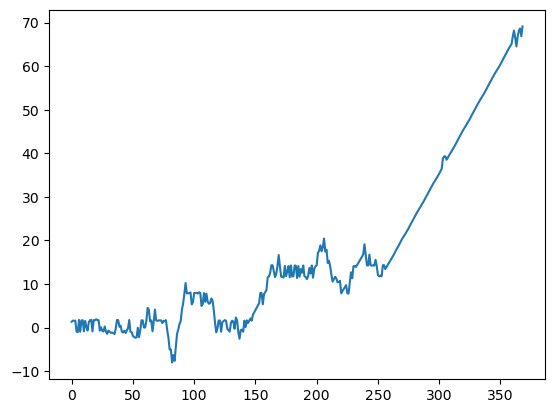

3.068537126371667
./videos2/9.2hz.mp4


100%|██████████| 392/392 [00:35<00:00, 11.03it/s]


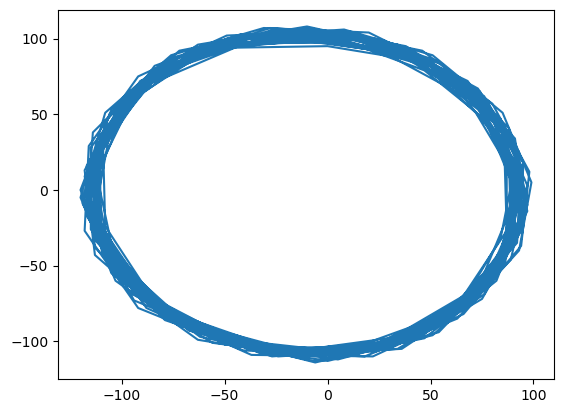

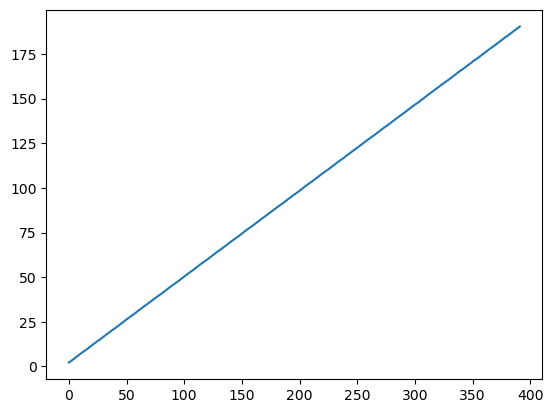

9.191635291270305


In [6]:
filesnames = glob.glob("./videos2/*.mp4")
datas = []
for filename in filesnames: 
    print(filename)
    process(filename)

In [28]:
freqs = np.array([float(i[9:-6]) for i in filesnames])
freqs

array([14.5, 10. , 14.7, 11. , 14.9, 14.8, 13. , 13.5,  8. , 15. , 14. ,
        9. ,  7. , 12. , 14.6])

In [26]:
freqs.sort()
freqs

array([ 7. ,  8. ,  9. , 10. , 11. , 12. , 13. , 13.5, 14. , 14.5, 14.6,
       14.7, 14.8, 14.9, 15. ])

In [19]:
observed = np.array([14.558319874886147,9.994751375615744,14.694543810697057,10.990878273951125,14.074144668751378,14.79257096720033,12.983121902950025,13.48612125223003,7.994112949489365,0.005426605096932117
,13.994275105998366,8.995891182463573,7.015478298744959,11.99546116941913,14.698834888932776])

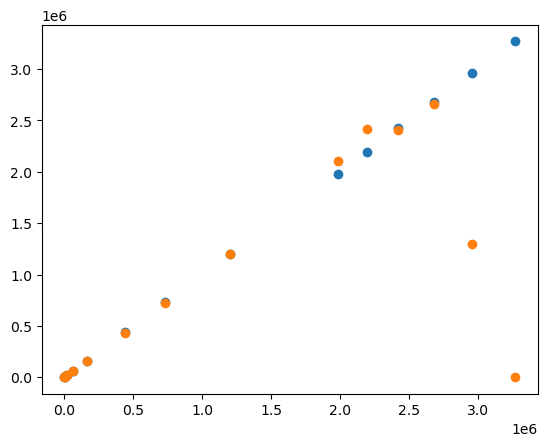

In [31]:
plt.scatter(np.exp(freqs),np.exp(freqs))
plt.scatter(np.exp(freqs),np.exp(observed))

./videos/14.5hz.mp4


 88%|████████▊ | 349/397 [02:16<00:10,  4.47it/s]/tmp/ipykernel_920270/33418274.py:59: RuntimeWarning: divide by zero encountered in scalar divide
  theta = np.arctan(vector[1]/vector[0])
100%|██████████| 397/397 [02:25<00:00,  2.73it/s]


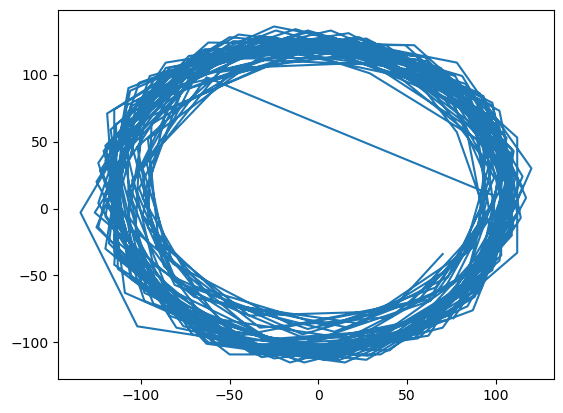

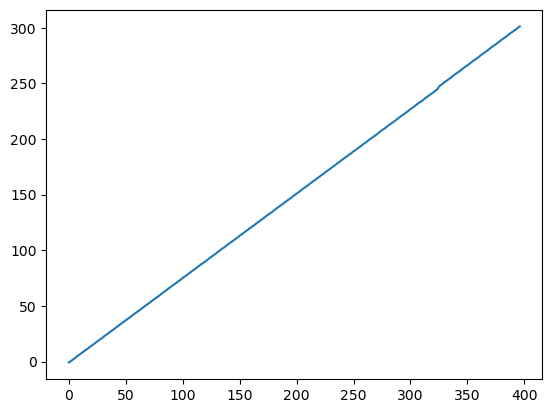

14.558319874886147
./videos/10hz.mp4


100%|██████████| 430/430 [00:40<00:00, 10.49it/s]


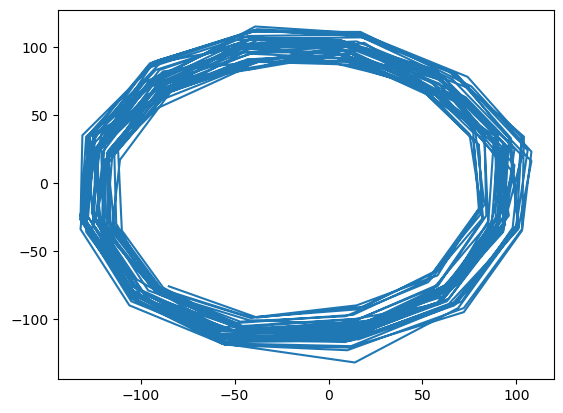

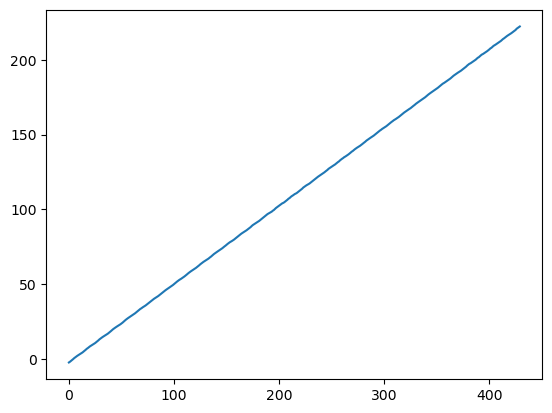

9.994751375615744
./videos/14.7hz.mp4


100%|██████████| 384/384 [00:50<00:00,  7.65it/s]


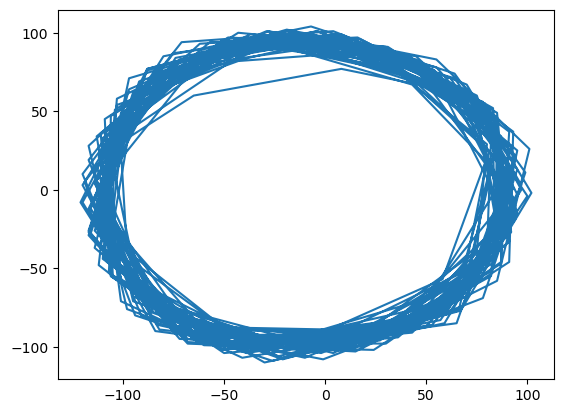

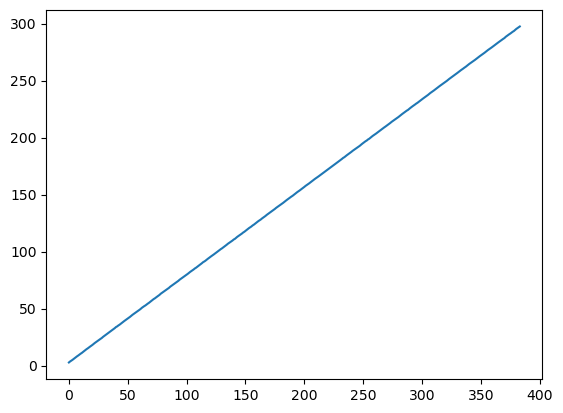

14.694543810697057
./videos/11hz.mp4


100%|██████████| 398/398 [00:26<00:00, 14.78it/s]


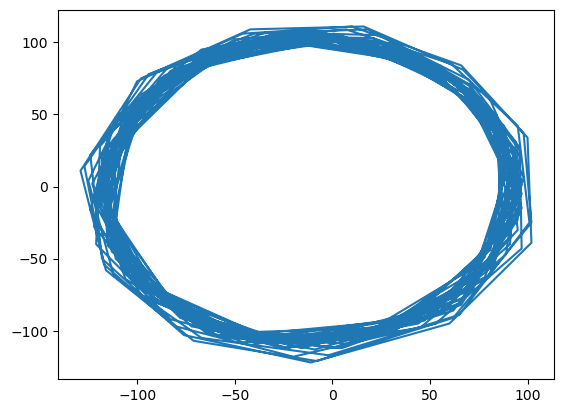

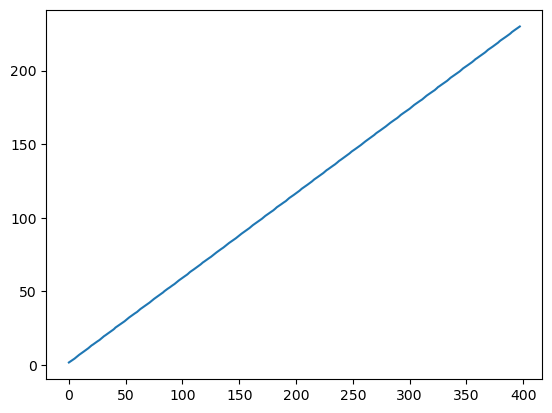

10.990878273951125
./videos/14.9hz.mp4


100%|██████████| 409/409 [00:30<00:00, 13.48it/s]


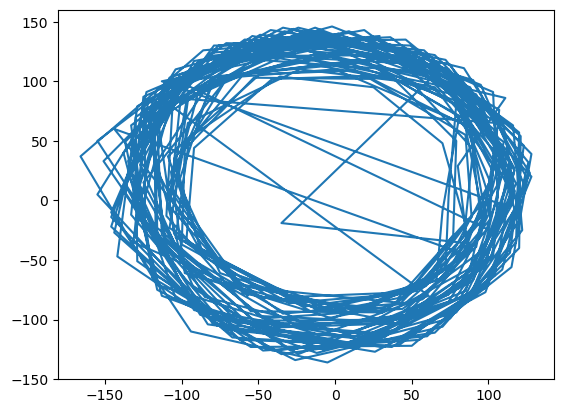

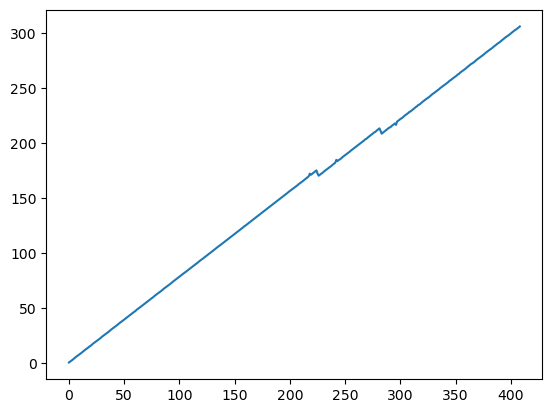

14.074144668751378
./videos/14.8hz.mp4


100%|██████████| 387/387 [00:40<00:00,  9.48it/s]


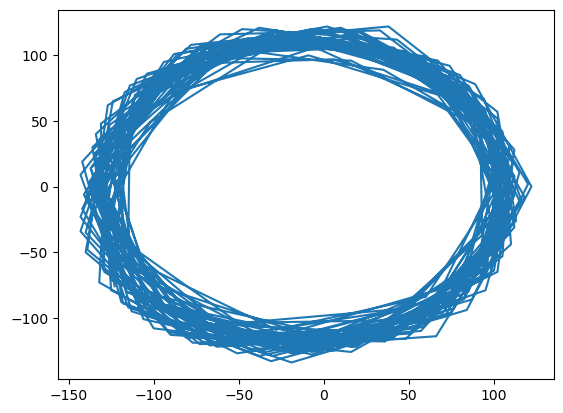

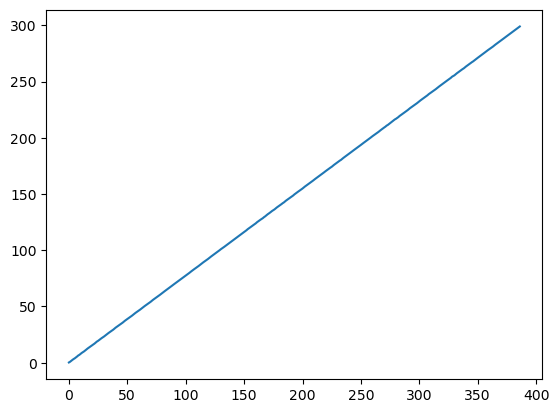

14.79257096720033
./videos/13hz.mp4


100%|██████████| 411/411 [00:24<00:00, 17.06it/s]


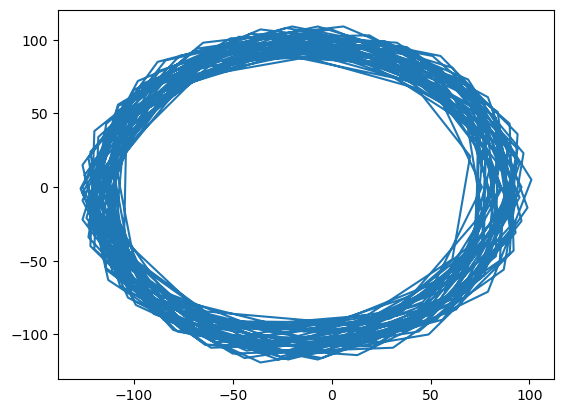

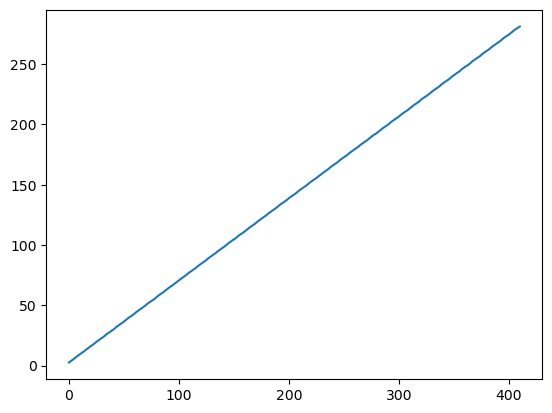

12.983121902950025
./videos/13.5hz.mp4


100%|██████████| 378/378 [00:29<00:00, 12.93it/s]


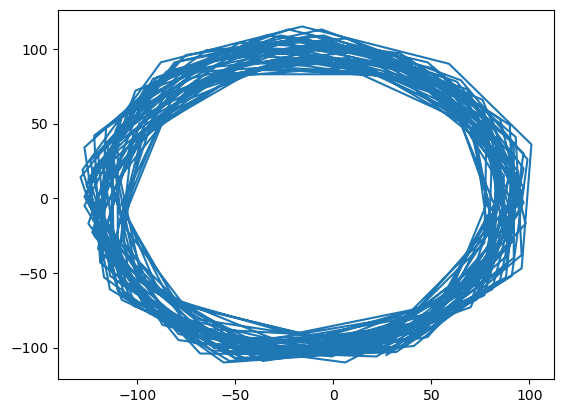

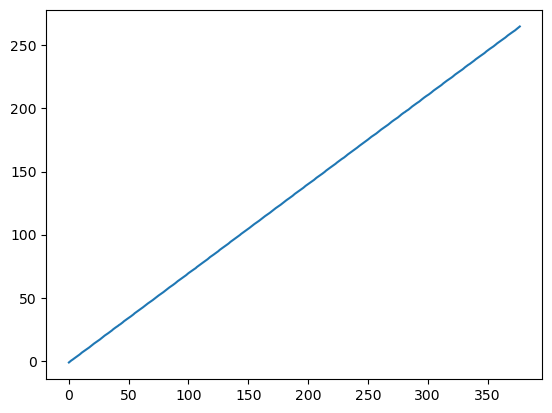

13.48612125223003
./videos/8hz.mp4


100%|██████████| 374/374 [00:34<00:00, 10.75it/s]


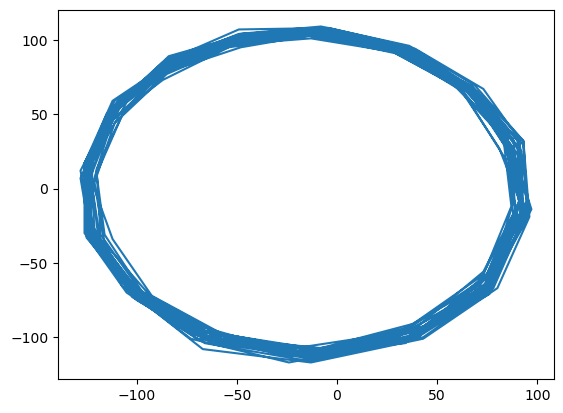

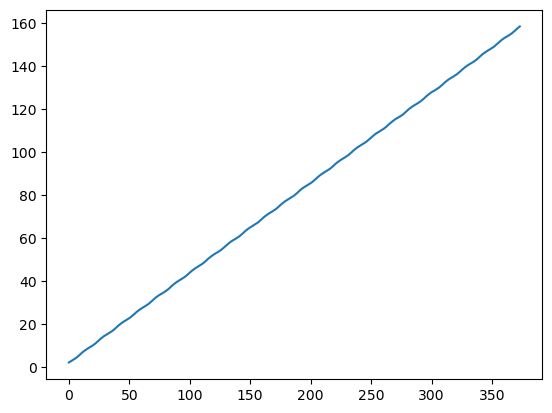

7.994112949489365
./videos/15hz.mp4


100%|██████████| 373/373 [44:15<00:00,  7.12s/it] 


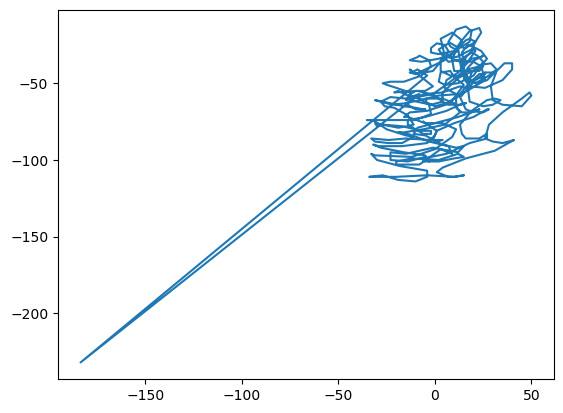

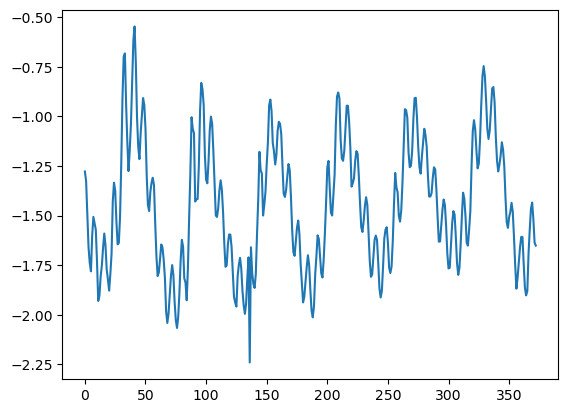

0.005426605096932117
./videos/14hz.mp4


100%|██████████| 428/428 [01:24<00:00,  5.08it/s]


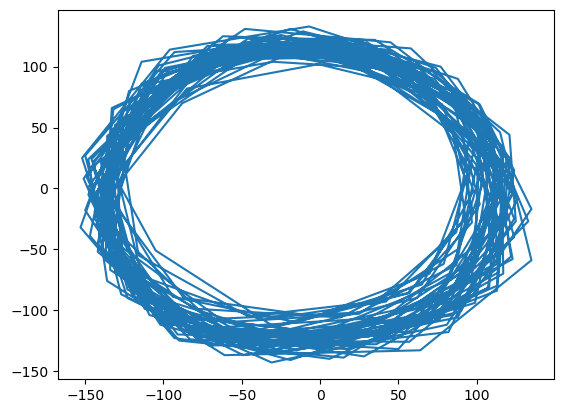

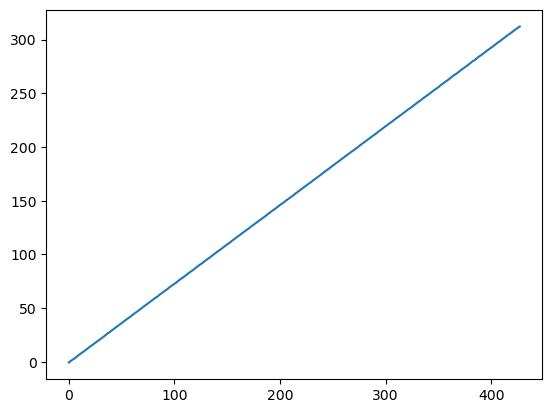

13.994275105998366
./videos/9hz.mp4


100%|██████████| 394/394 [00:27<00:00, 14.51it/s]


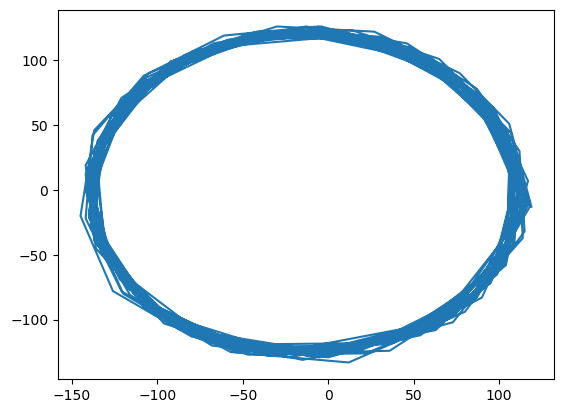

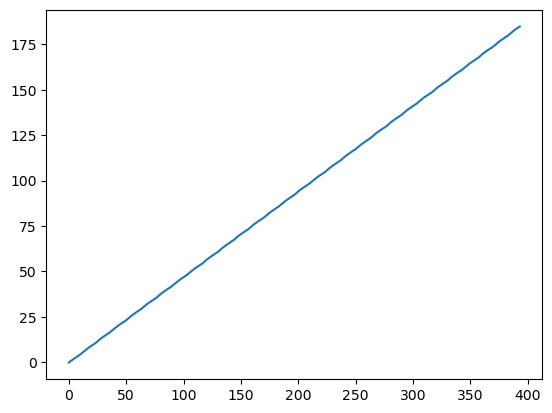

8.995891182463573
./videos/7hz.mp4


100%|██████████| 401/401 [17:12<00:00,  2.58s/it]


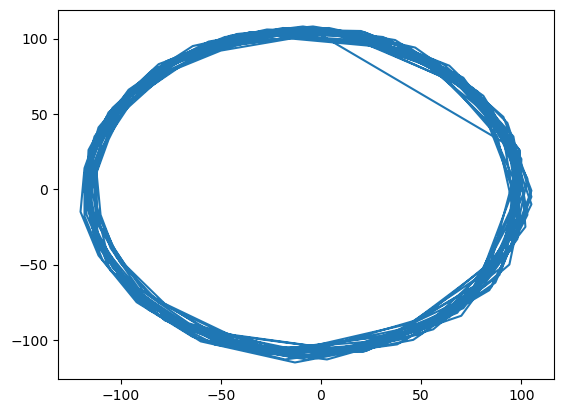

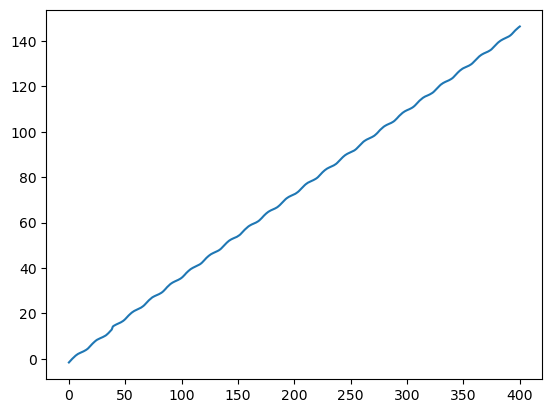

7.015478298744959
./videos/12hz.mp4


100%|██████████| 399/399 [00:25<00:00, 15.58it/s]


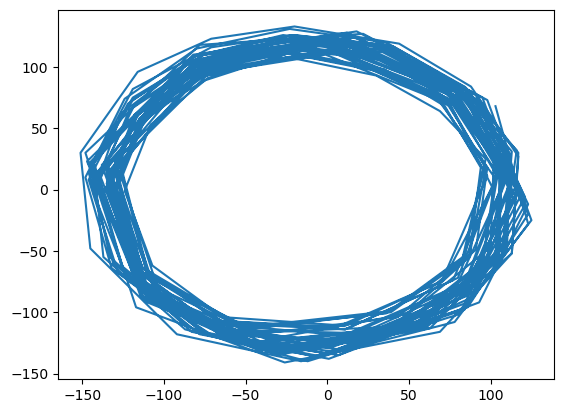

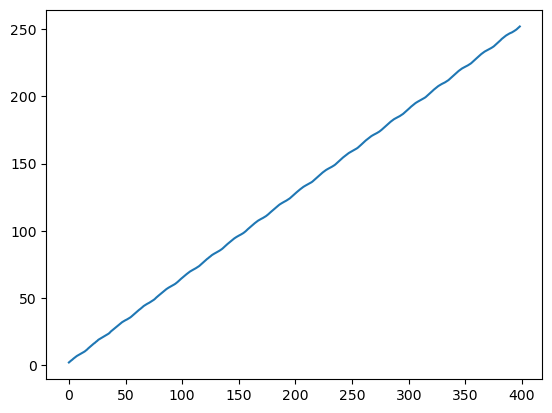

11.99546116941913
./videos/14.6hz.mp4


100%|██████████| 376/376 [00:34<00:00, 10.89it/s]


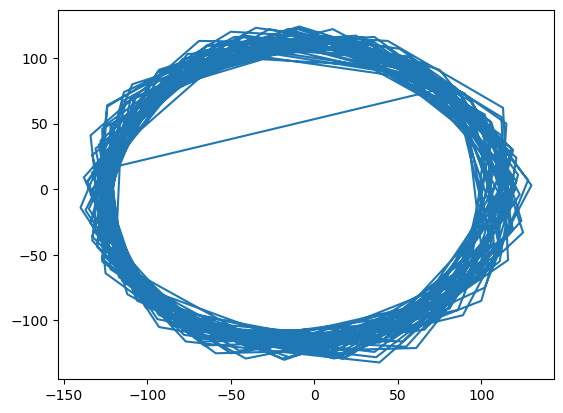

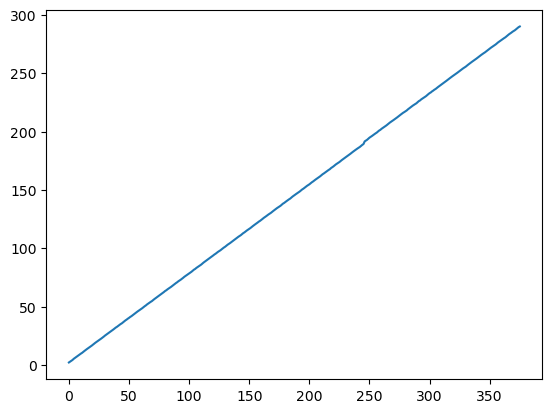

14.698834888932776


In [7]:
datas = []
for filename in filesnames: 
    print(filename)
    datas.append(process(filename))

In [3]:
# videodata = skvideo.io.vread("./videos/15hz.mp4")  
videodata = video_to_numpy("./videos/15hz.mp4")

(373, 1080, 1920, 3)


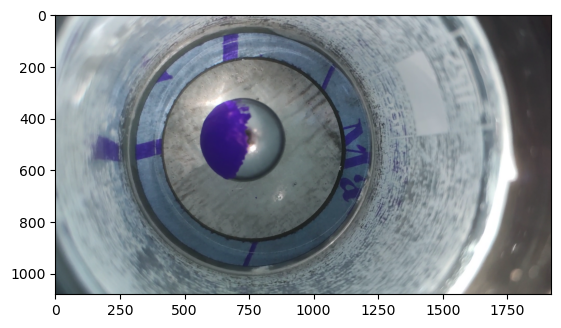

In [14]:

print(videodata.shape)
plt.imshow(videodata[64])


In [15]:

# rads = np.zeros(videodata.shape[0])
rads = np.zeros(videodata.shape[0])
data = np.zeros((videodata.shape[0],2))

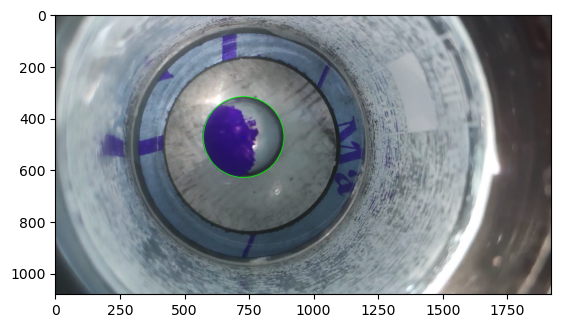

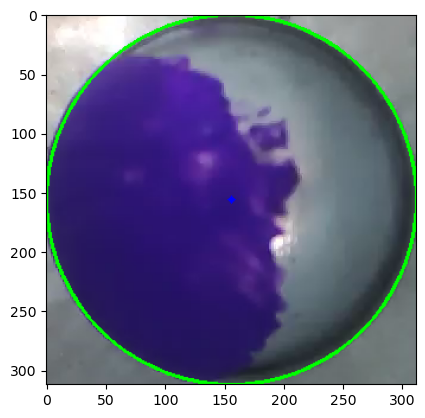

In [16]:
img = videodata[0].astype(np.uint8)

# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

# Blur using 3 * 3 kernel. 
gray_blurred = cv2.blur(gray, (3, 3)) 
# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(gray_blurred,  
                cv2.HOUGH_GRADIENT, 1, 70, param1 = 60, 
            param2 = 30, minRadius = 70, maxRadius = 300) 

# Draw circles that are detected. 
if detected_circles is not None: 

    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 

    pt =  detected_circles[0, 0] 
    a, b, r = pt[0], pt[1], pt[2] 

    # Draw the circumference of the circle. 
    cv2.circle(img, (a, b), r, (0, 255, 0), 2) 

    # Draw a small circle (of radius 1) to show the center. 
    cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
    plt.imshow(img)
    plt.show()



selected = img[b-r:b+r,a-r:a+r,:]
plt.imshow(img[b-r:b+r,a-r:a+r,:])
plt.show()


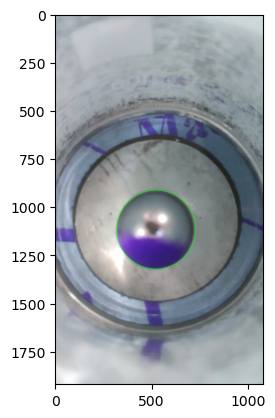

In [86]:
img = videodata[0].astype(np.uint8)

# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

# Blur using 3 * 3 kernel. 
gray_blurred = cv2.blur(gray, (3, 3)) 
# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(gray_blurred,  
                cv2.HOUGH_GRADIENT, 1, 70, param1 = 60, 
            param2 = 30, minRadius = 70, maxRadius = 300) 

# Draw circles that are detected. 
if detected_circles is not None: 

    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 

    pt =  detected_circles[0, 0] 
    a, b, r = pt[0], pt[1], pt[2] 

    # Draw the circumference of the circle. 
    cv2.circle(img, (a, b), r, (0, 255, 0), 2) 

    # Draw a small circle (of radius 1) to show the center. 
    cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
    plt.imshow(img)
    plt.show()
else:
    print("error")



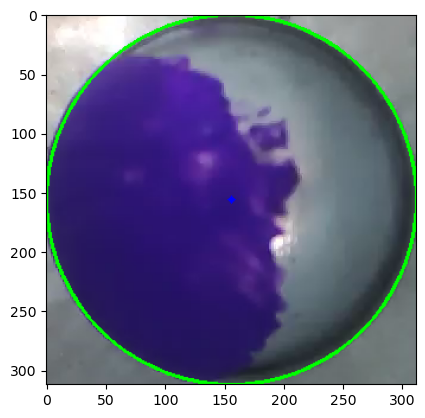

In [17]:


selected = img[b-r:b+r,a-r:a+r,:]
plt.imshow(img[b-r:b+r,a-r:a+r,:])
plt.show()


In [115]:
selected[300,200]

array([ 68,  30, 147], dtype=uint8)

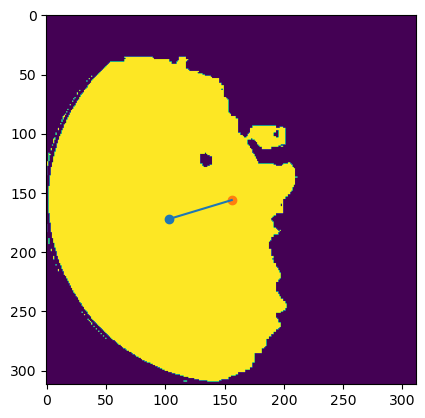

In [20]:

gamma = 1.5
blues = np.logical_and(selected[:,:,2] >= gamma*selected[:,:,1], selected[:,:,2] >= gamma*selected[:,:,0])
blues_center = np.round(np.mean(np.argwhere(blues),axis = 0)).astype(np.int64)
plt.imshow(blues)
center = np.array([selected.shape[0],selected.shape[1]])/2

plt.scatter(blues_center[1],blues_center[0])
plt.scatter(center[1],center[0])
plt.plot([center[1],blues_center[1]],[center[0],blues_center[0]])
plt.show()


0
1
2
3
4
5
6
7
8
9


/tmp/ipykernel_765380/3879843379.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  theta = np.arctan(vector[1]/vector[0])


10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
28

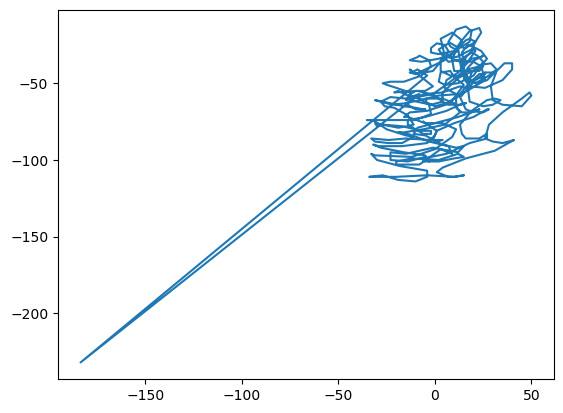

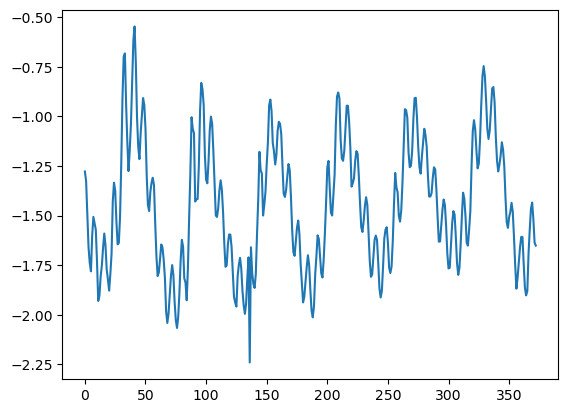

0.0014206818922045722


In [21]:
for i in range(videodata.shape[0]):
    print(i)
    # Read image. 
    img = videodata[i].astype(np.uint8)

    # Convert to grayscale. 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    
    # Blur using 3 * 3 kernel. 
    gray_blurred = cv2.blur(gray, (3, 3)) 
    # Apply Hough transform on the blurred image. 
    detected_circles = cv2.HoughCircles(gray_blurred,  
                    cv2.HOUGH_GRADIENT, 1, 70, param1 = 60, 
                param2 = 30, minRadius = 70, maxRadius = 300) 
    
    # Draw circles that are detected. 
    if detected_circles is not None: 
    
        # Convert the circle parameters a, b and r to integers. 
        detected_circles = np.uint16(np.around(detected_circles)) 
    
        pt =  detected_circles[0, 0] 
        a, b, r = pt[0], pt[1], pt[2] 

        # Draw the circumference of the circle. 
        cv2.circle(img, (a, b), r, (0, 255, 0), 2) 

        # Draw a small circle (of radius 1) to show the center. 
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
        # plt.imshow(img)
        # plt.show()
    else:
        print("error")



    selected = img[b-r:b+r,a-r:a+r,:]
    # plt.imshow(img[b-r:b+r,a-r:a+r,:])
    # plt.show()

    gamma = 1.5
    blues = np.logical_and(selected[:,:,2] >= gamma*selected[:,:,1], selected[:,:,2] >= gamma*selected[:,:,0])
    blues_center = np.round(np.mean(np.argwhere(blues),axis = 0)).astype(np.int64)
    # plt.imshow(blues)
    center = np.array([selected.shape[0],selected.shape[1]])/2

    # plt.scatter(blues_center[1],blues_center[0])
    # plt.scatter(center[1],center[0])
    # plt.plot([center[1],blues_center[1]],[center[0],blues_center[0]])
    # plt.show()

    vector = (blues_center - center)

    theta = np.arctan(vector[1]/vector[0])

    # print(f"theta = {theta}")
    # print(f"degree = {np.rad2deg(theta)}")

    data[i] = vector

plt.plot(data[:,0],data[:,1])
plt.show()

plt.plot(np.arange(data.shape[0]),np.unwrap(np.angle(data[:,0] + data[:,1] * 1j))) 
plt.show()

print(scipy.stats.linregress(np.arange(data.shape[0]),np.unwrap(np.angle(data[:,0] + data[:,1] * 1j)))[0] * 120 / (2*np.pi))






In [121]:
(2.3551188042767297/1.8318187148856873 - 9/7 )/(9/7)

-3.256047784130603e-05

1.2857142857142858

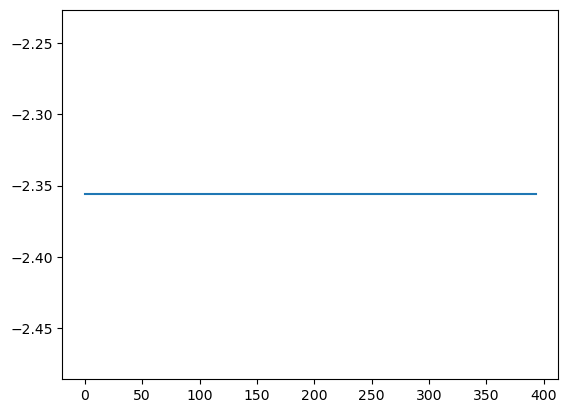

In [74]:
plt.plot(np.arange(data.shape[0]),np.angle(data[:,0] + data[:,1] * 1j))
plt.show()

In [48]:
1.8318187148856873 * 24 / (2*np.pi)

6.99703207973521

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


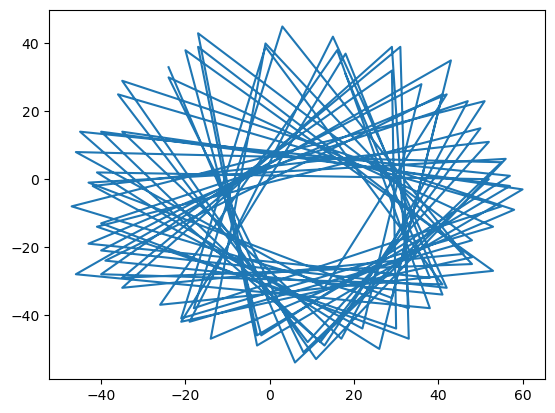

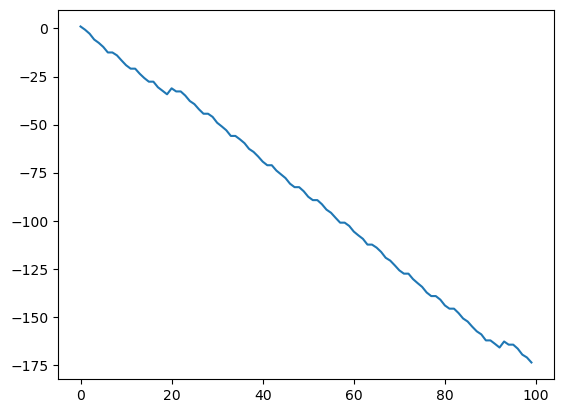

-8.996529395580268


In [118]:
videodata = skvideo.io.vread("./yektaliza/9hz.avi")  
data = np.zeros((100,2))
for i in range(100):
    print(i)
    # Read image. 
    img = videodata[i].astype(np.uint8)

    # Convert to grayscale. 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    
    # Blur using 3 * 3 kernel. 
    gray_blurred = cv2.blur(gray, (3, 3)) 
    # Apply Hough transform on the blurred image. 
    detected_circles = cv2.HoughCircles(gray_blurred,  
                    cv2.HOUGH_GRADIENT, 1, 70, param1 = 50, 
                param2 = 30, minRadius = 40, maxRadius = 100) 
    
    # Draw circles that are detected. 
    if detected_circles is not None: 
    
        # Convert the circle parameters a, b and r to integers. 
        detected_circles = np.uint16(np.around(detected_circles)) 
    
        pt =  detected_circles[0, 0] 
        a, b, r = pt[0], pt[1], pt[2] 

        # Draw the circumference of the circle. 
        cv2.circle(img, (a, b), r, (0, 255, 0), 2) 

        # Draw a small circle (of radius 1) to show the center. 
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
        # plt.imshow(img)
        # plt.show()



    selected = img[b-r:b+r,a-r:a+r,:]
    # plt.imshow(img[b-r:b+r,a-r:a+r,:])
    # plt.show()

    gamma = 1.5
    blues = np.logical_and(selected[:,:,0] >= gamma*selected[:,:,2], selected[:,:,0] >= gamma*selected[:,:,1])
    blues_center = np.round(np.mean(np.argwhere(blues),axis = 0)).astype(np.int64)
    # plt.imshow(blues)
    center = np.array([selected.shape[0],selected.shape[1]])/2

    # plt.scatter(blues_center[1],blues_center[0])
    # plt.scatter(center[1],center[0])
    # plt.plot([center[1],blues_center[1]],[center[0],blues_center[0]])
    # plt.show()

    vector = (blues_center - center)

    theta = np.arctan(vector[1]/vector[0])

    # print(f"theta = {theta}")
    # print(f"degree = {np.rad2deg(theta)}")

    data[i] = vector

plt.plot(data[:,0],data[:,1])
plt.show()

plt.plot(np.arange(100),np.unwrap(np.angle(data[:,0] + data[:,1] * 1j)))
plt.show()

print(scipy.stats.linregress(np.arange(100),np.unwrap(np.angle(data[:,0] + data[:,1] * 1j)))[0] * 5)






In [111]:
-11.305372262783836 / -6.144586091244653

1.8398915882865934

In [114]:
-6.144586091244653 * 5/ (2*np.pi)

-4.889706248376473

In [115]:
-11.305372262783836 * 5 / (2*np.pi)

-8.996529395580268

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


/tmp/ipykernel_15761/1349762492.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  theta = np.arctan(vector[1]/vector[0])


49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


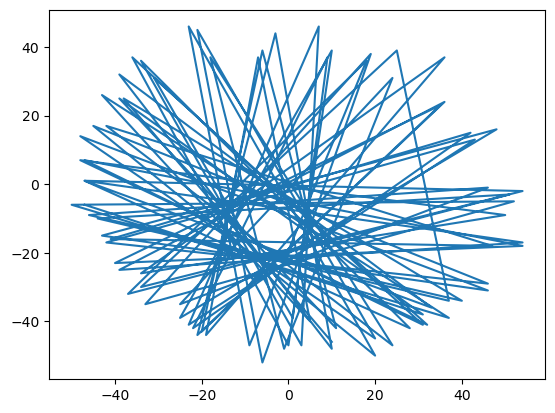

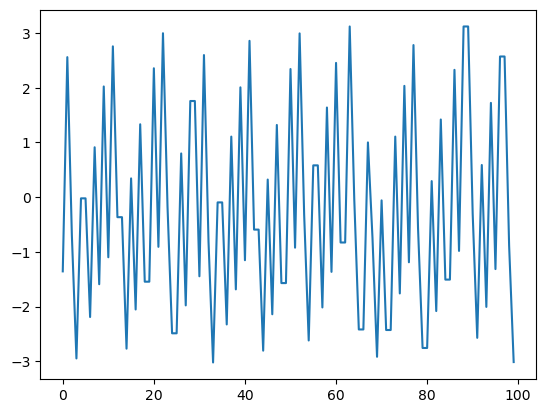

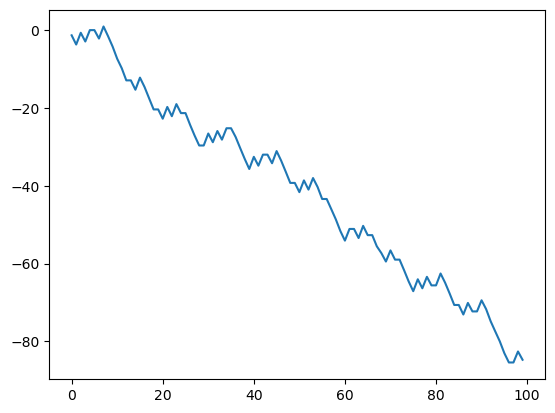

-4.133885889418152


In [120]:
videodata = skvideo.io.vread("./yektaliza/11hz.avi")  
data = np.zeros((100,2))
for i in range(100):
    print(i)
    # Read image. 
    img = videodata[i].astype(np.uint8)

    # Convert to grayscale. 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    
    # Blur using 3 * 3 kernel. 
    gray_blurred = cv2.blur(gray, (3, 3)) 
    # Apply Hough transform on the blurred image. 
    detected_circles = cv2.HoughCircles(gray_blurred,  
                    cv2.HOUGH_GRADIENT, 1, 70, param1 = 50, 
                param2 = 30, minRadius = 40, maxRadius = 100) 
    
    # Draw circles that are detected. 
    if detected_circles is not None: 
    
        # Convert the circle parameters a, b and r to integers. 
        detected_circles = np.uint16(np.around(detected_circles)) 
    
        pt =  detected_circles[0, 0] 
        a, b, r = pt[0], pt[1], pt[2] 

        # Draw the circumference of the circle. 
        cv2.circle(img, (a, b), r, (0, 255, 0), 2) 

        # Draw a small circle (of radius 1) to show the center. 
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
        # plt.imshow(img)
        # plt.show()



    selected = img[b-r:b+r,a-r:a+r,:]
    # plt.imshow(img[b-r:b+r,a-r:a+r,:])
    # plt.show()

    gamma = 1.5
    blues = np.logical_and(selected[:,:,0] >= gamma*selected[:,:,2], selected[:,:,0] >= gamma*selected[:,:,1])
    blues_center = np.round(np.mean(np.argwhere(blues),axis = 0)).astype(np.int64)
    # plt.imshow(blues)
    center = np.array([selected.shape[0],selected.shape[1]])/2

    # plt.scatter(blues_center[1],blues_center[0])
    # plt.scatter(center[1],center[0])
    # plt.plot([center[1],blues_center[1]],[center[0],blues_center[0]])
    # plt.show()

    vector = (blues_center - center)

    theta = np.arctan(vector[1]/vector[0])

    # print(f"theta = {theta}")
    # print(f"degree = {np.rad2deg(theta)}")

    data[i] = vector

plt.plot(data[:,0],data[:,1])
plt.show()


plt.plot(np.arange(100),(np.angle(data[:,0] + data[:,1] * 1j)))
plt.show()

plt.plot(np.arange(100),np.unwrap(np.angle(data[:,0] + data[:,1] * 1j)))
plt.show()

print(scipy.stats.linregress(np.arange(100),np.unwrap(np.angle(data[:,0] + data[:,1] * 1j)))[0] * 5 )






In [87]:
videodata = skvideo.io.vread("./rc1.avi")  
rads = np.zeros(100)
data = np.zeros((100,2))
print(videodata.shape)

(501, 600, 800, 3)


In [82]:
# plt.imshow(videodata[0])

In [95]:
videodata = skvideo.io.vread("./rc2.avi")  


In [112]:
cap = cv2.VideoCapture("./rc2.avi")
ret, frame = cap.read() 

In [117]:
frame

array([[[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [12, 12, 12]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 4,  4,  4],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [11, 11, 11]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [11, 11, 11],
        [13, 13, 13],
        [13, 13, 13]],

       ...,

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [ 9,  9,  9],
        [ 8,  8,  8],
        [ 8,  8,  8]],

       [[ 3,  3,  3],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [ 9,  9,  9]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [ 9,  9,  9]]], dtype=uint8)

In [119]:
frams = np.zeros((6000,600,800,3), dtype=np.uint8)

In [125]:
# Open the video file for capturing frames
cap = cv2.VideoCapture('rc2.avi')
 
# Loop through the video frames
for i in range(6000):
    print(i)
    _,frame = cap.read()
    print(frame.shape)
 
    # Convert the frame to grayscale
    # gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    # # Display the grayscale frame
    # cv2.imshow('frame', gray)
 
    # # Check if the user pressed 'q' to quit
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break
 
# Release the video capture object

0
(600, 800, 3)
1
(600, 800, 3)
2
(600, 800, 3)
3
(600, 800, 3)
4
(600, 800, 3)
5
(600, 800, 3)
6
(600, 800, 3)
7
(600, 800, 3)
8
(600, 800, 3)
9
(600, 800, 3)
10
(600, 800, 3)
11
(600, 800, 3)
12
(600, 800, 3)
13
(600, 800, 3)
14
(600, 800, 3)
15
(600, 800, 3)
16
(600, 800, 3)
17
(600, 800, 3)
18
(600, 800, 3)
19
(600, 800, 3)
20
(600, 800, 3)
21
(600, 800, 3)
22
(600, 800, 3)
23
(600, 800, 3)
24
(600, 800, 3)
25
(600, 800, 3)
26
(600, 800, 3)
27
(600, 800, 3)
28
(600, 800, 3)
29
(600, 800, 3)
30
(600, 800, 3)
31
(600, 800, 3)
32
(600, 800, 3)
33
(600, 800, 3)
34
(600, 800, 3)
35
(600, 800, 3)
36
(600, 800, 3)
37
(600, 800, 3)
38
(600, 800, 3)
39
(600, 800, 3)
40
(600, 800, 3)
41
(600, 800, 3)
42
(600, 800, 3)
43
(600, 800, 3)
44
(600, 800, 3)
45
(600, 800, 3)
46
(600, 800, 3)
47
(600, 800, 3)
48
(600, 800, 3)
49
(600, 800, 3)
50
(600, 800, 3)
51
(600, 800, 3)
52
(600, 800, 3)
53
(600, 800, 3)
54
(600, 800, 3)
55
(600, 800, 3)
56
(600, 800, 3)
57
(600, 800, 3)
58
(600, 800, 3)
59
(600

AttributeError: 'NoneType' object has no attribute 'shape'

In [105]:
frame.shape

(600, 800, 3)

In [96]:
videodata.shape

(501, 600, 800, 3)

0


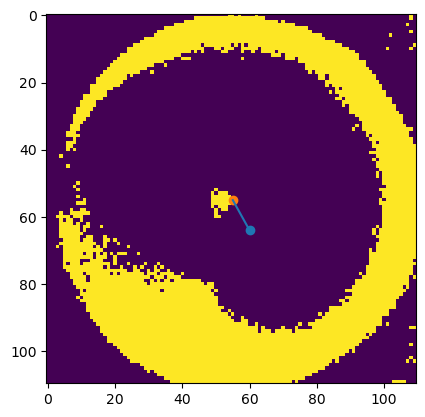

1


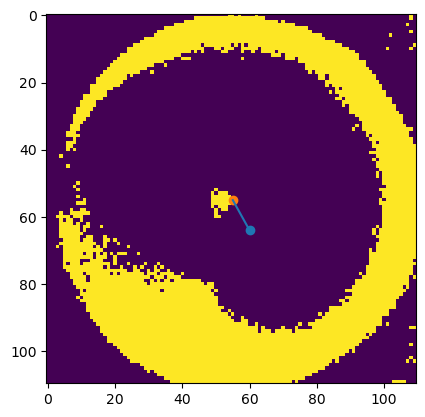

2


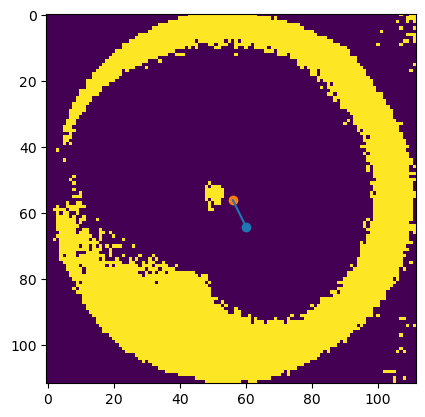

3


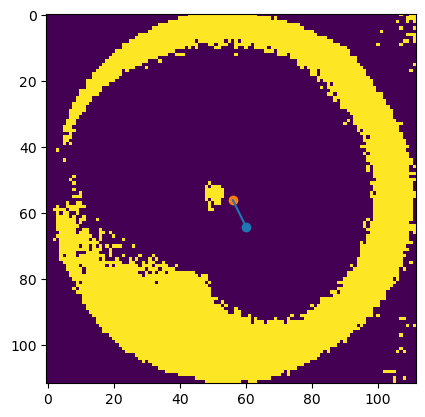

4


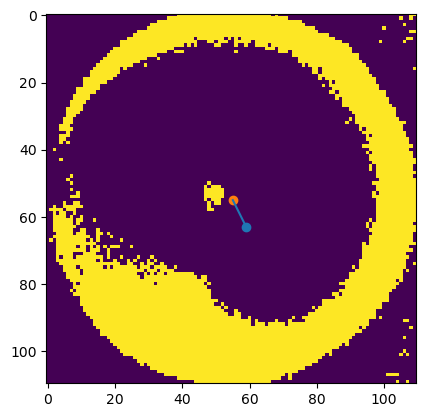

5


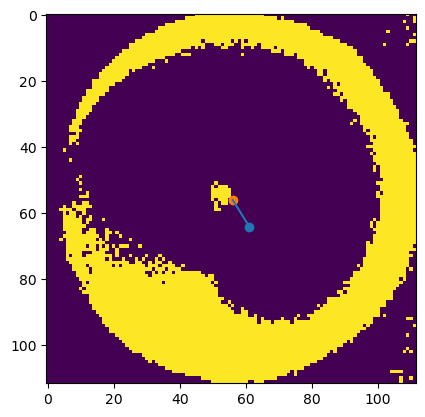

6


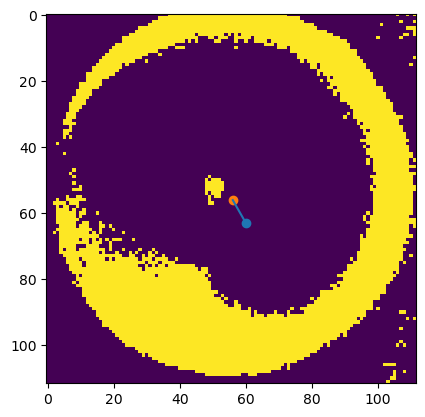

7


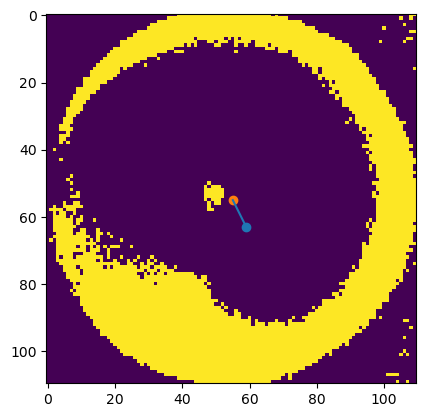

8


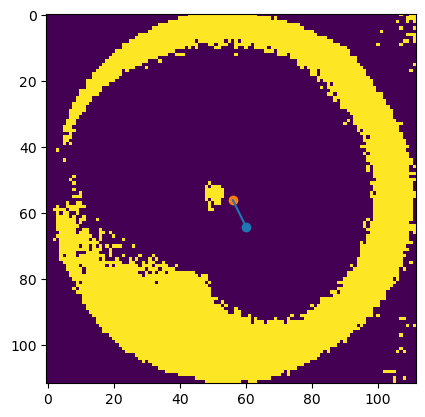

9


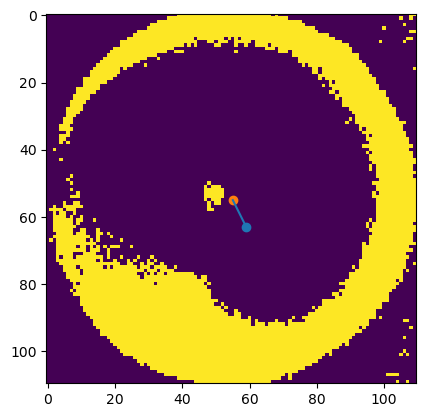

10


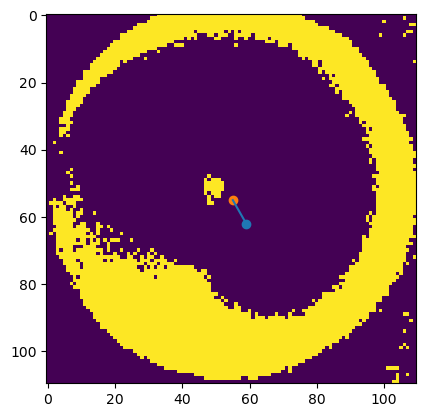

11


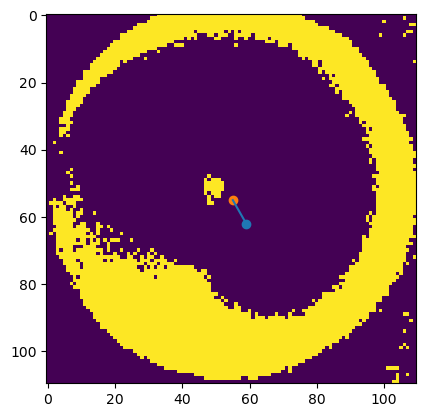

12


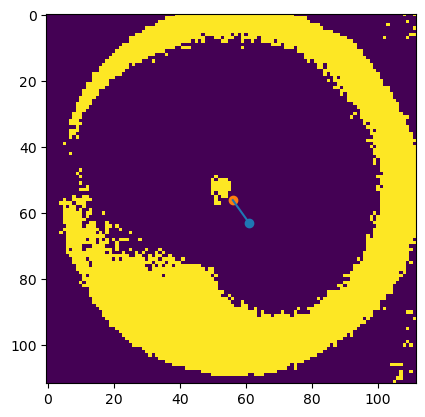

13


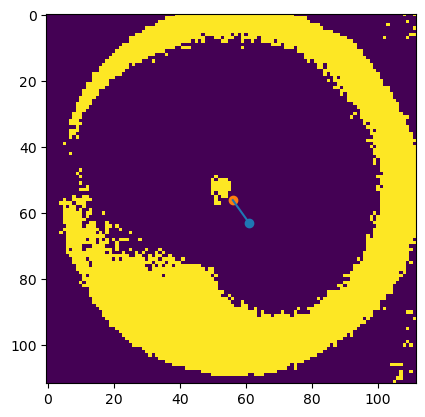

14


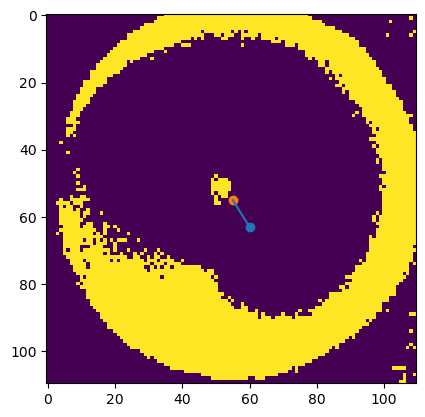

15


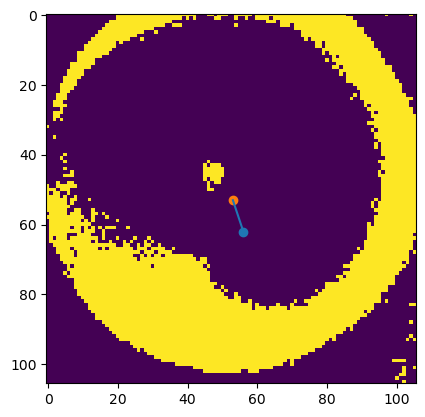

16


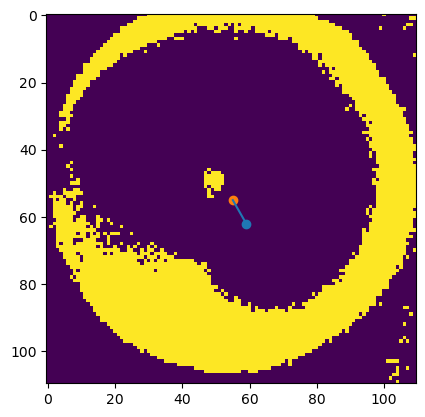

17


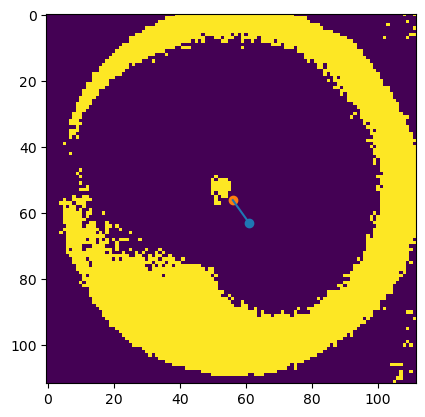

18


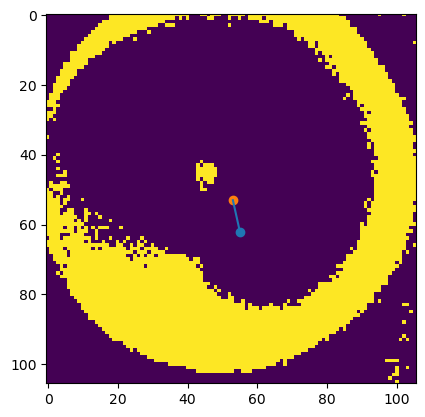

19


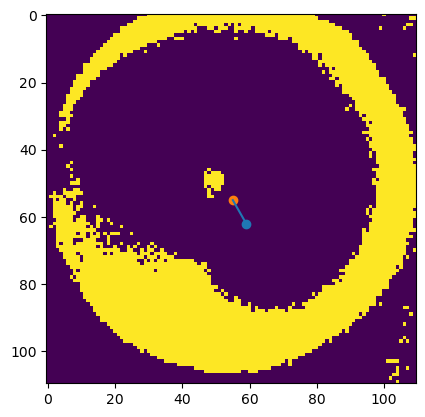

20


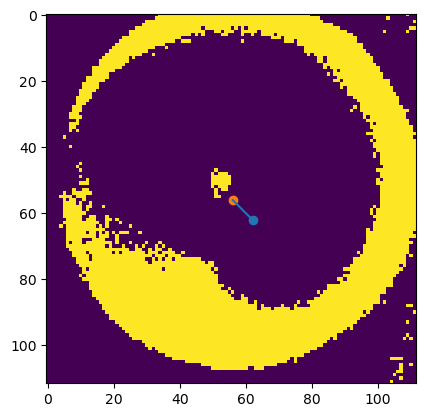

21


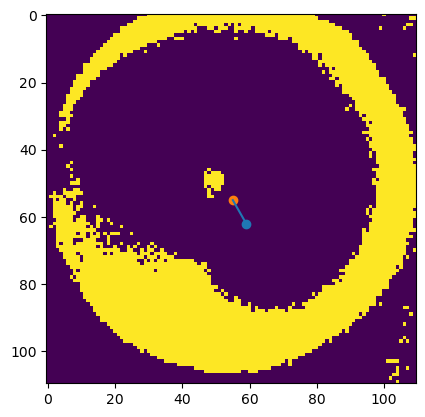

22


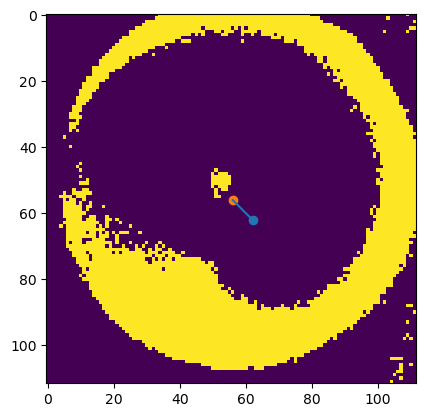

23


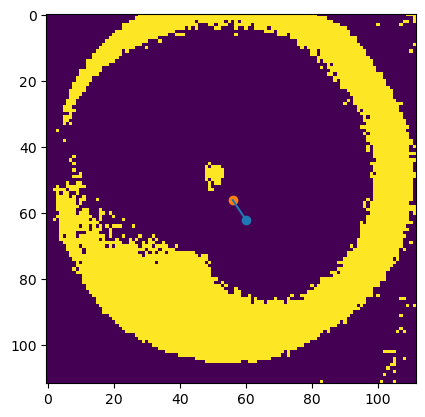

24


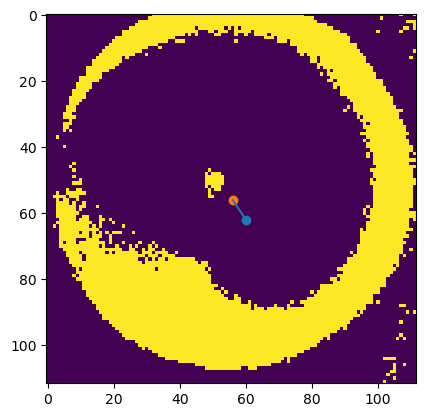

25


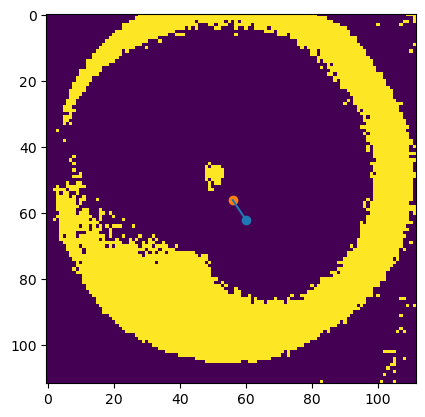

26


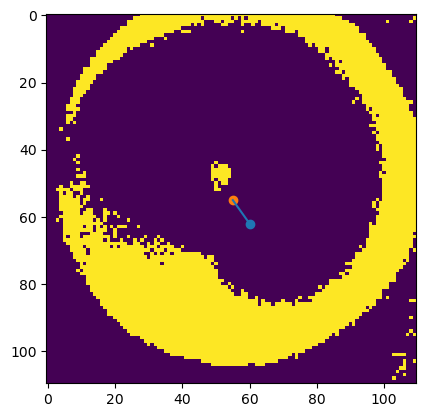

27


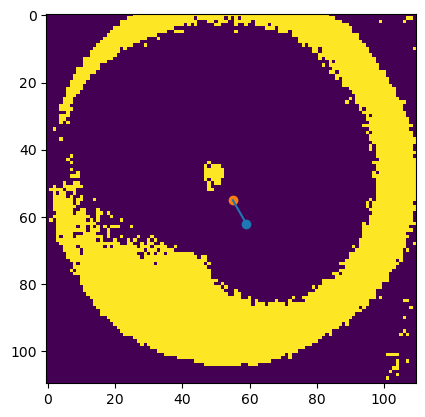

28


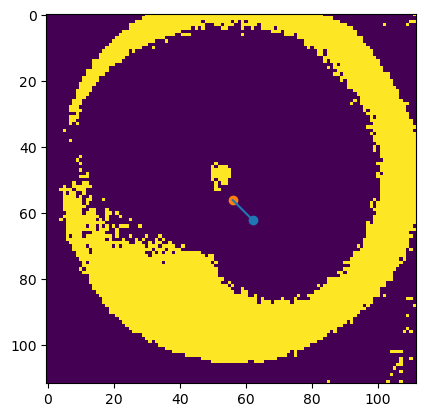

29


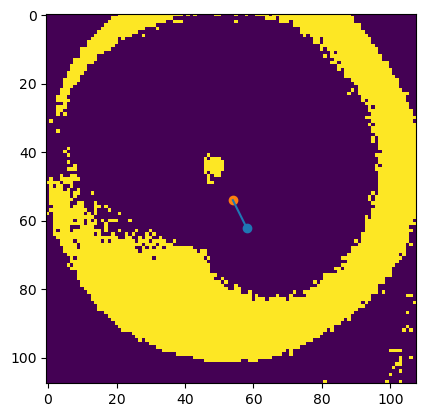

30


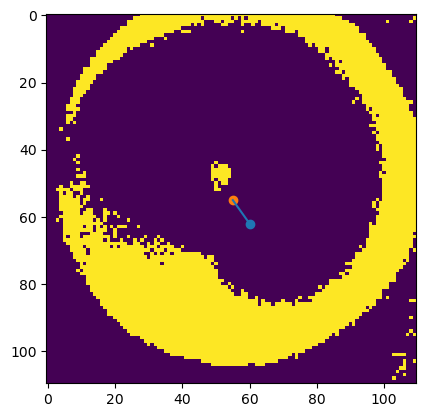

31


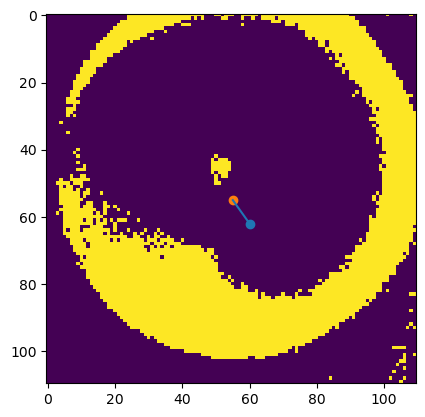

32


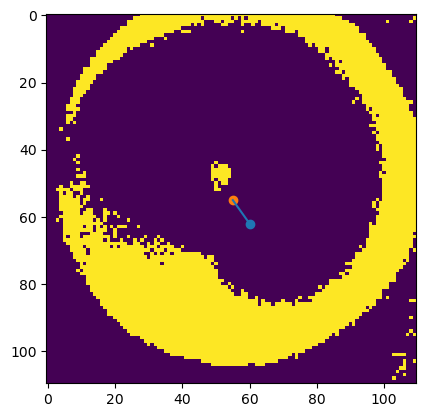

33


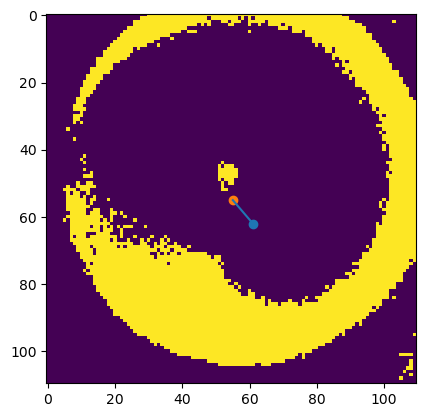

34


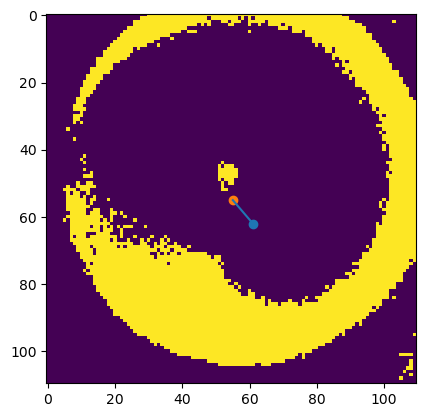

35


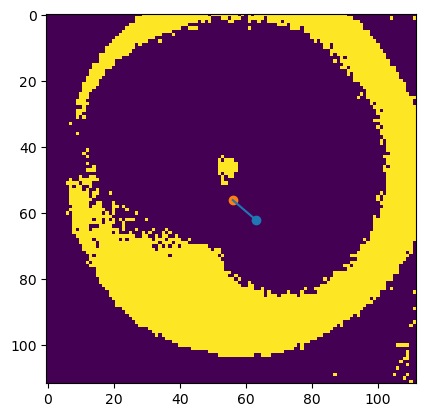

36


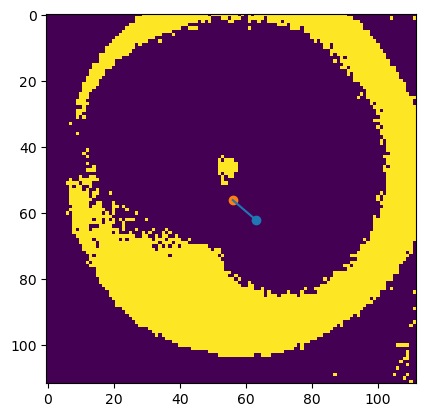

37


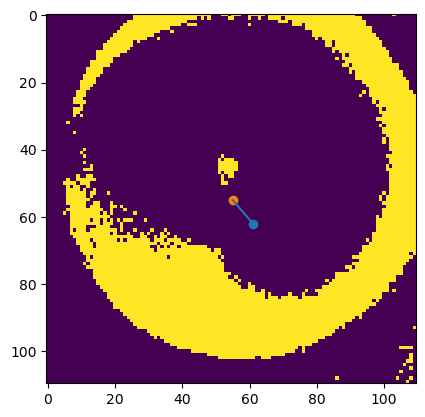

38


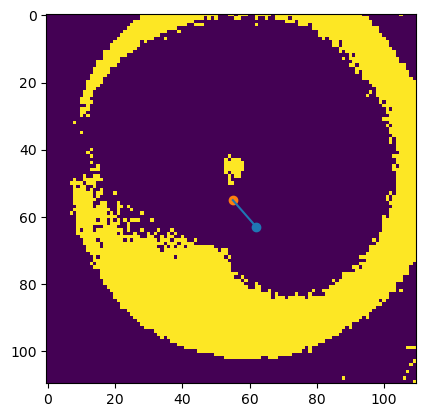

39


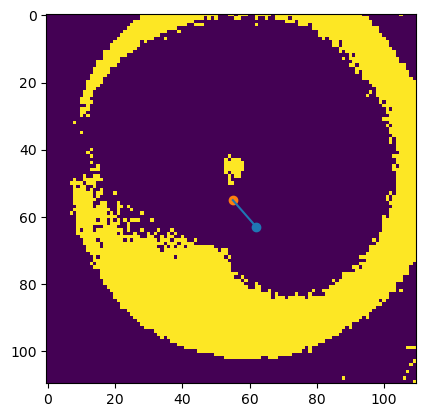

40


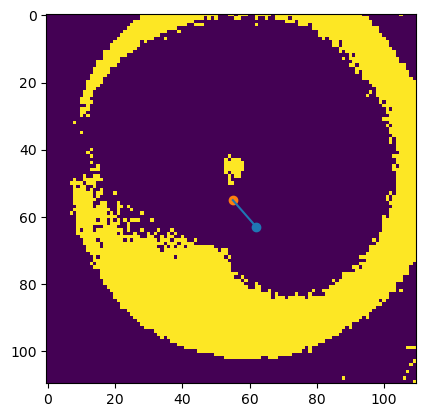

41


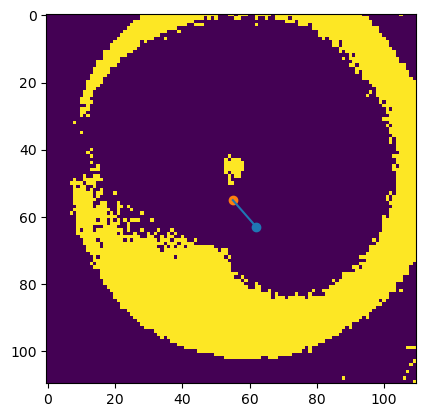

42


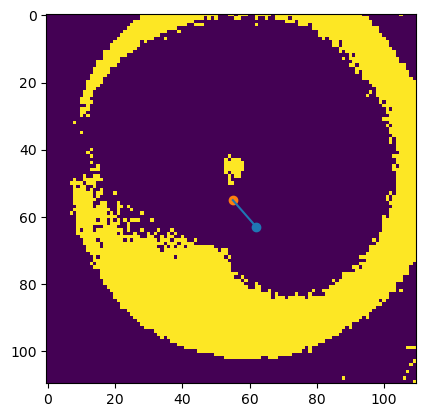

43


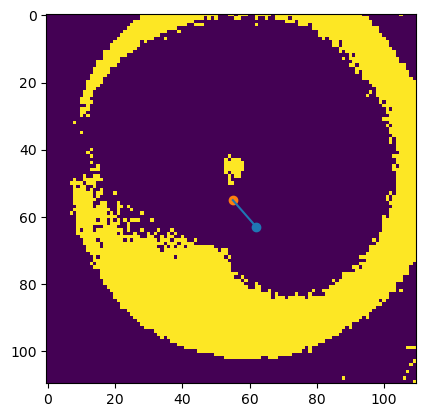

44


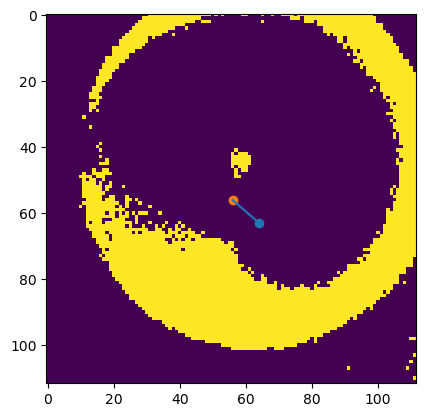

45


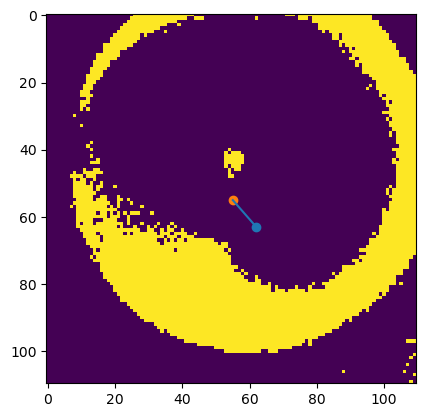

46


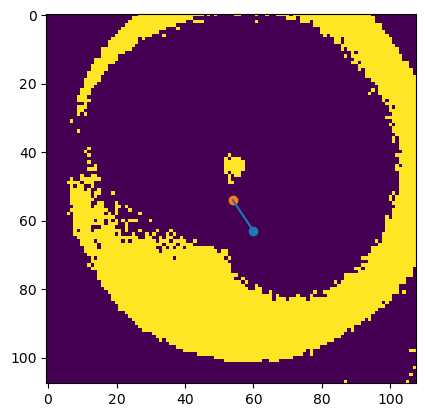

47


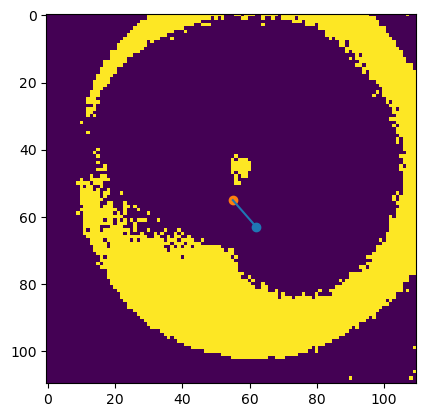

48


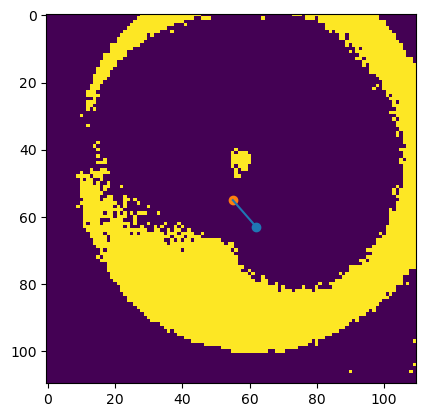

49


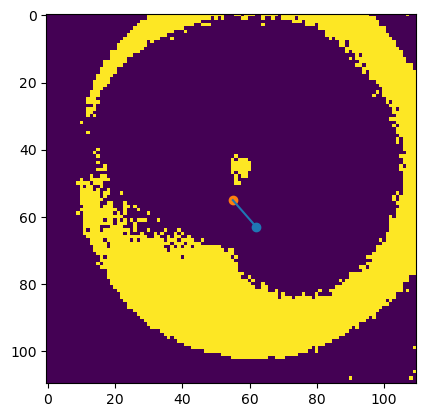

50


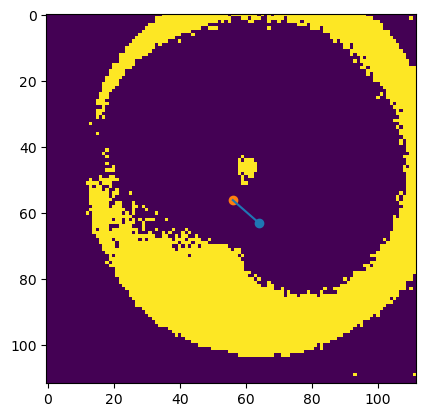

51


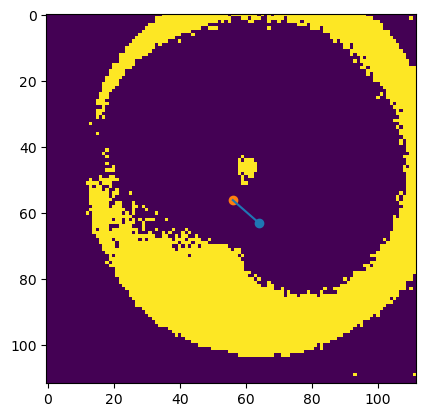

52


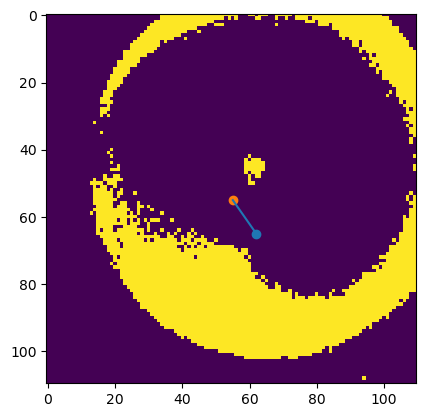

53


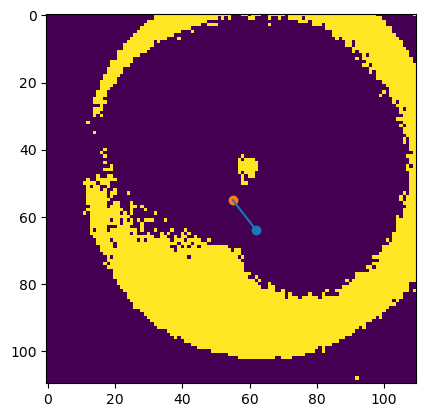

54


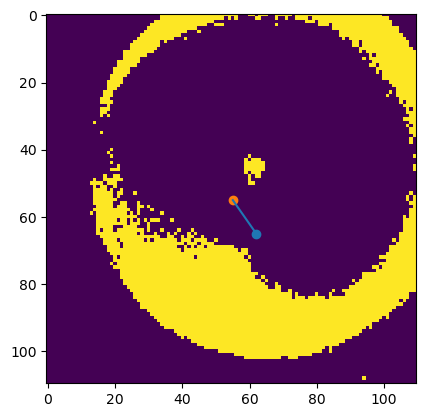

55


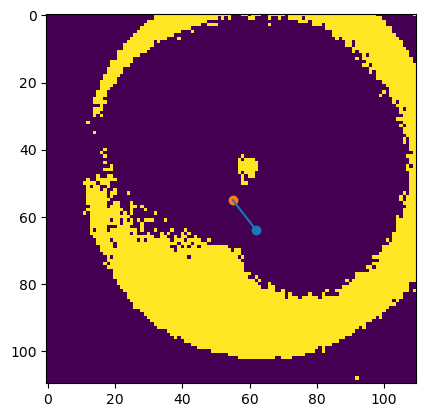

56


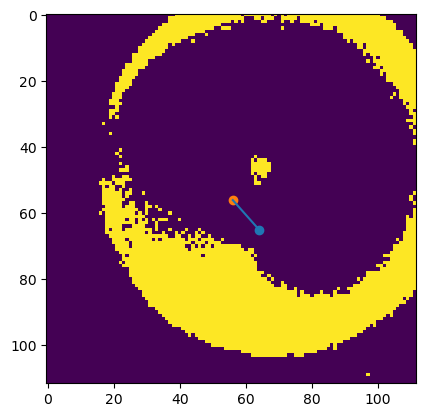

57


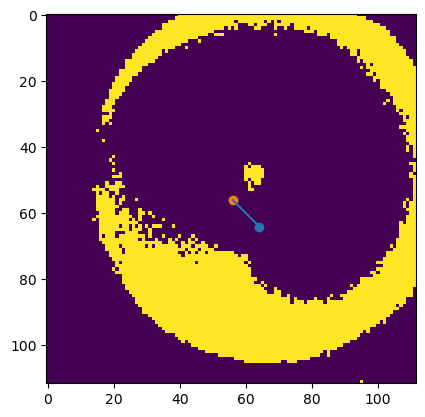

58


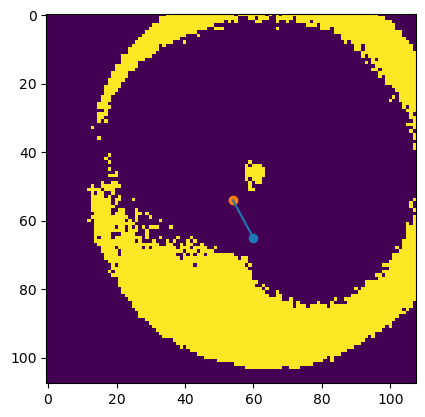

59


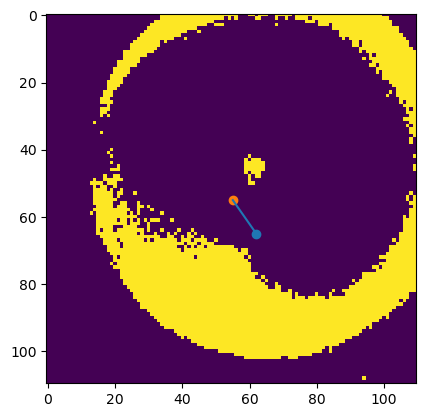

60


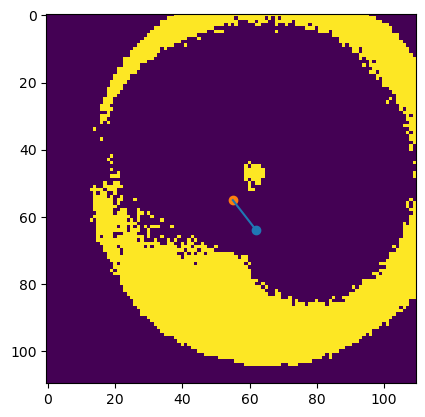

61


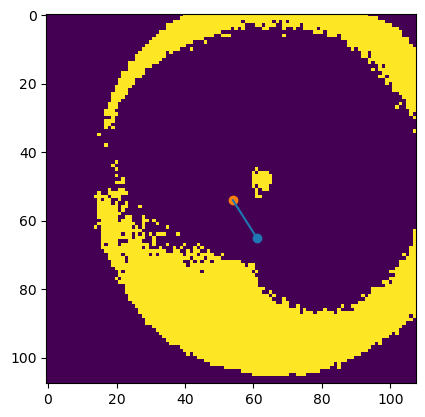

62


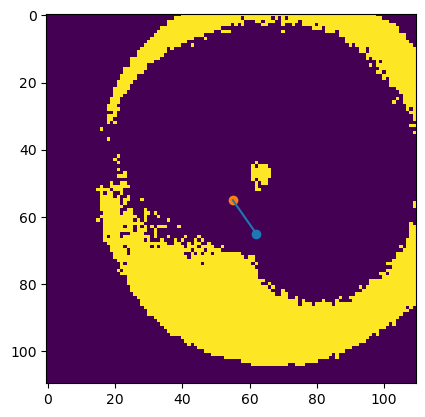

63


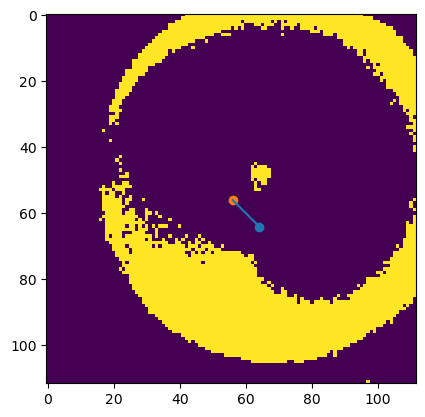

64


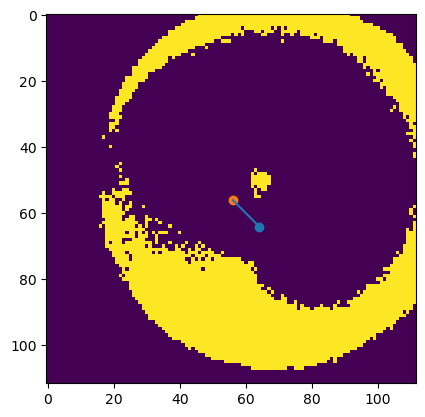

65


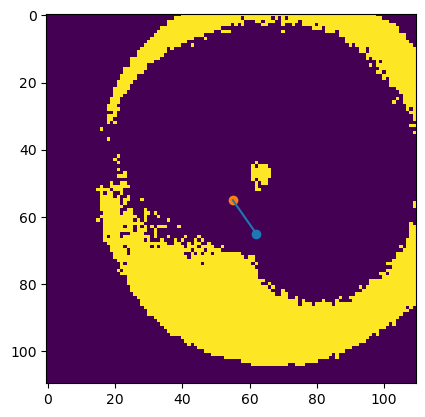

66


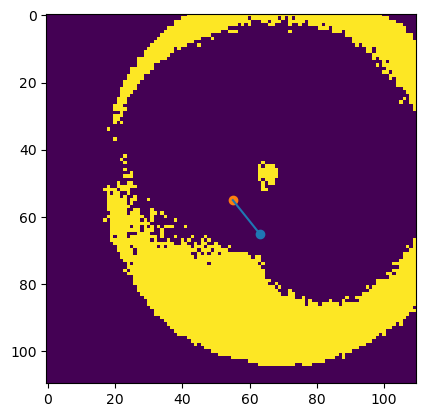

67


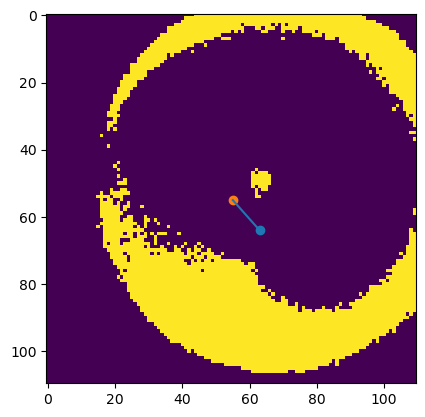

68


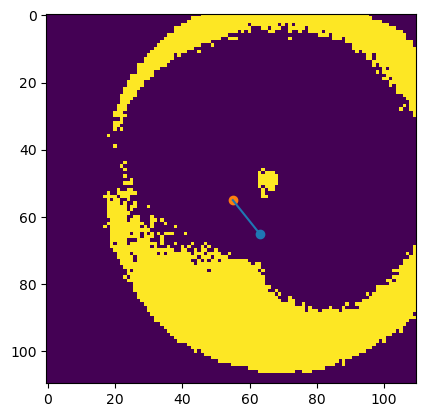

69


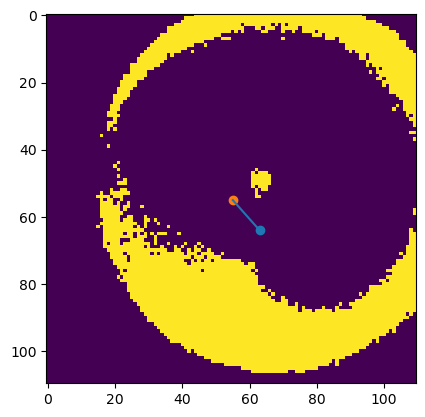

70


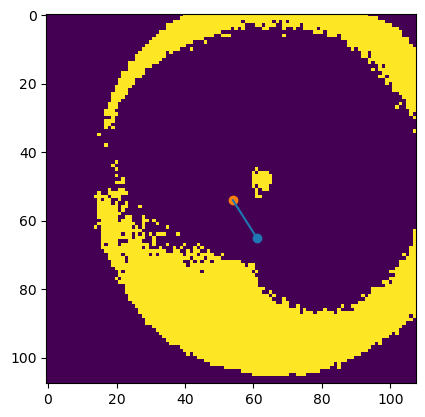

71


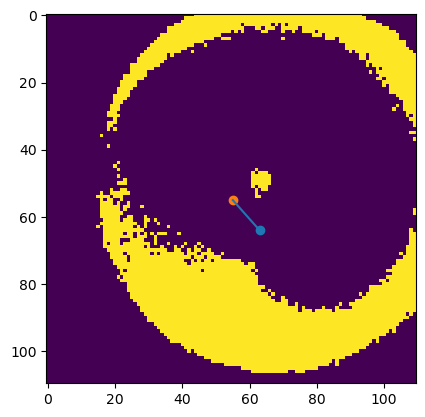

72


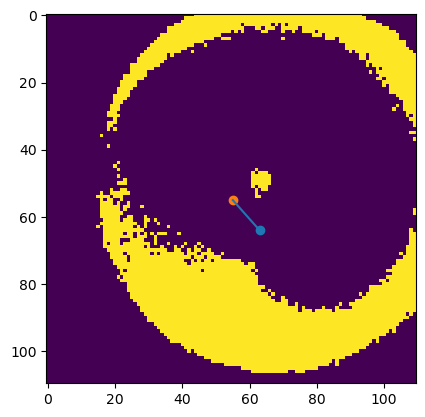

73


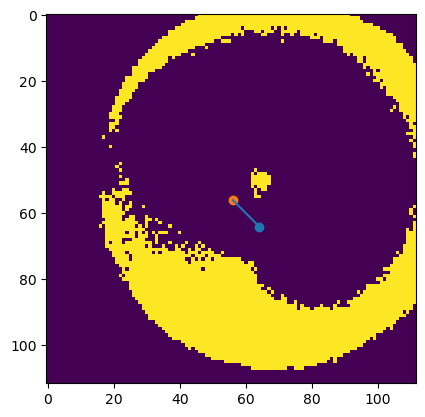

74


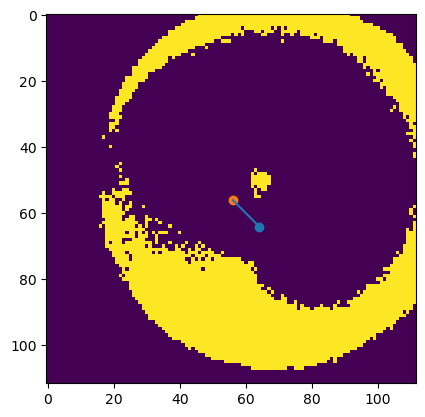

75


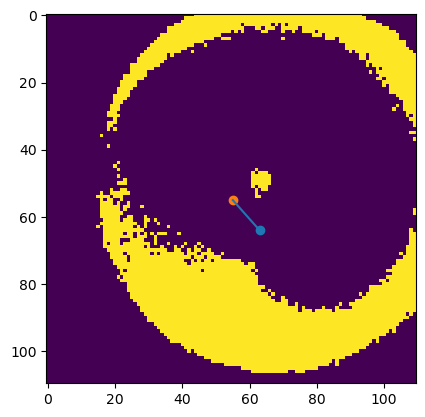

76


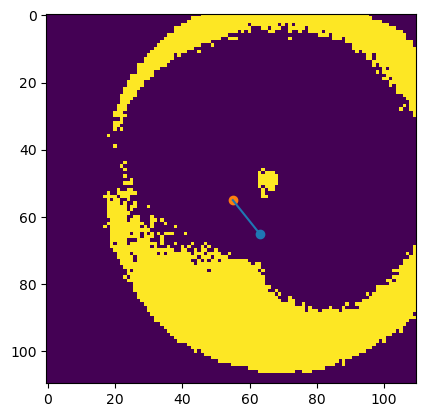

77


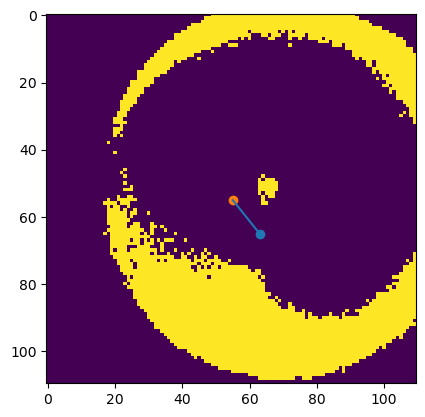

78


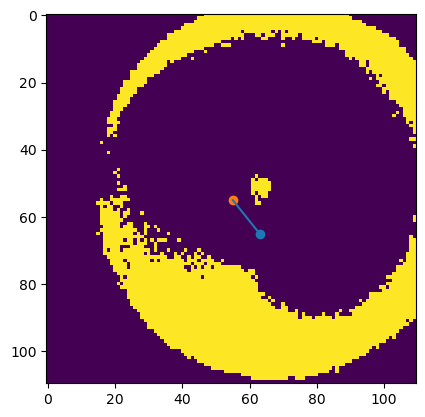

79


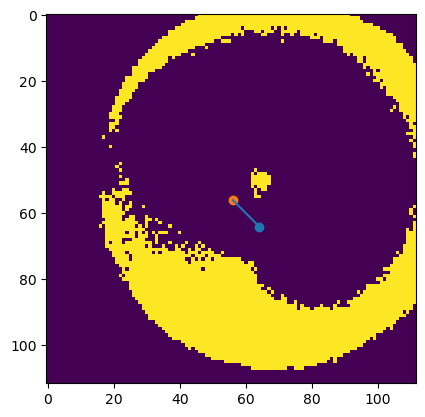

80


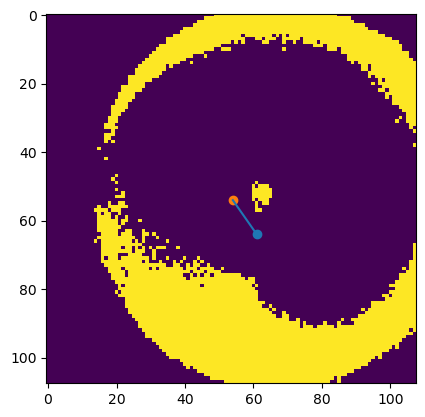

81


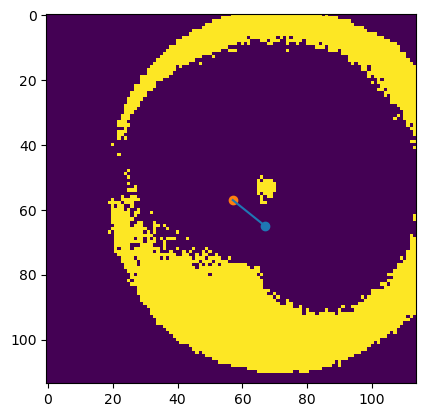

82


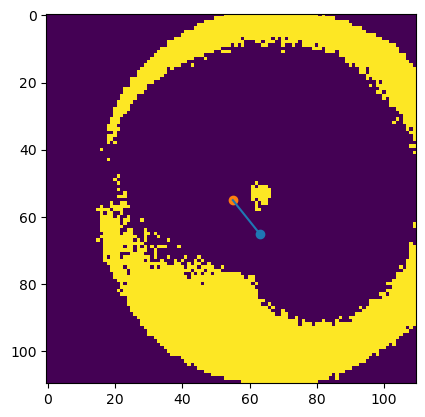

83


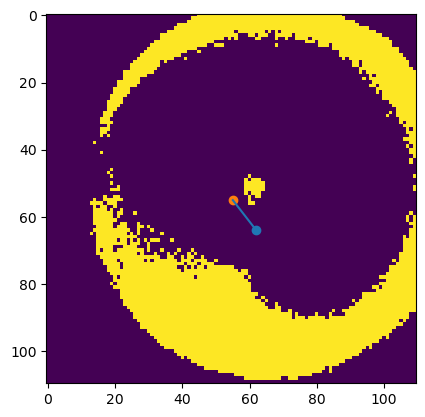

84


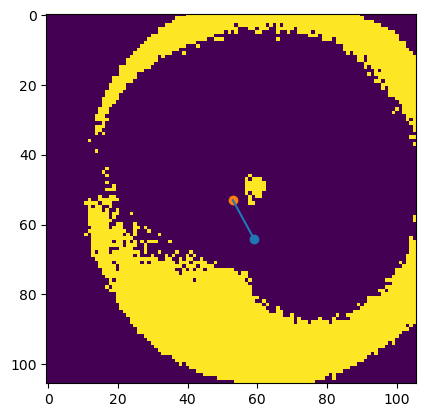

85


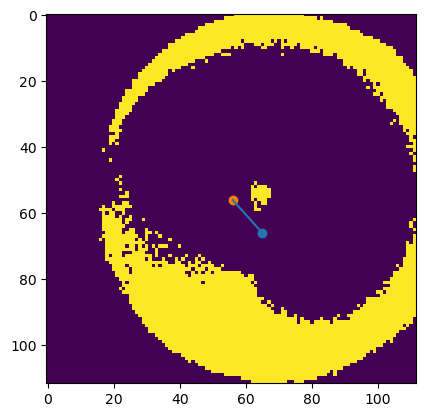

86


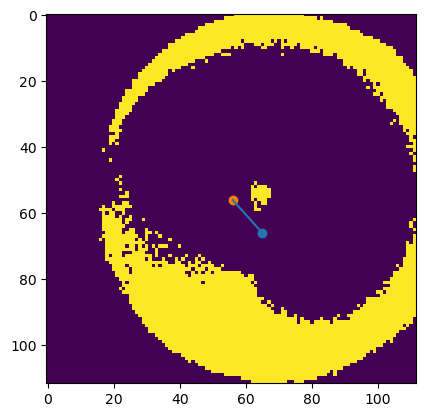

87


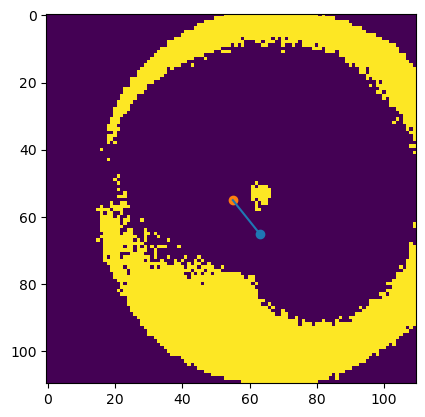

88


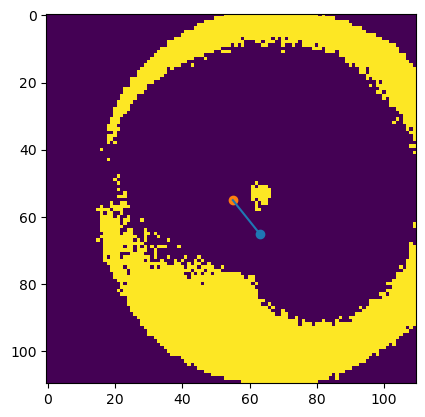

89


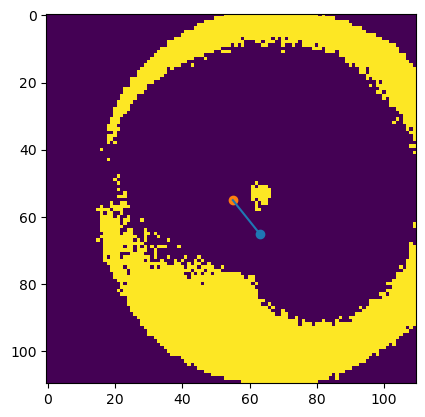

90


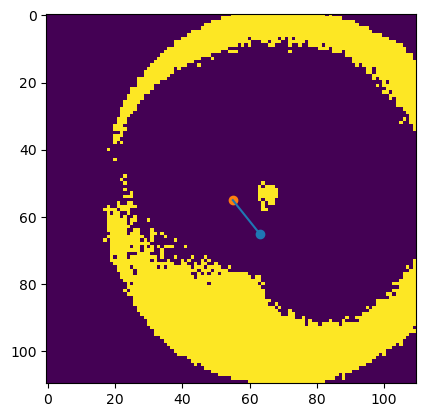

91


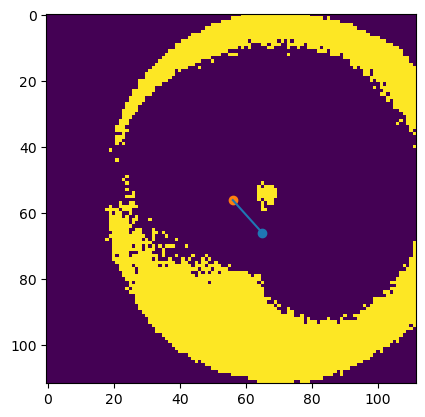

92


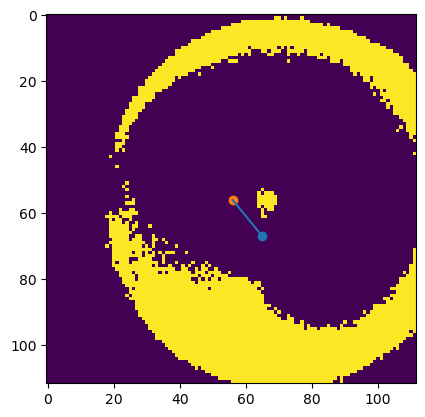

93


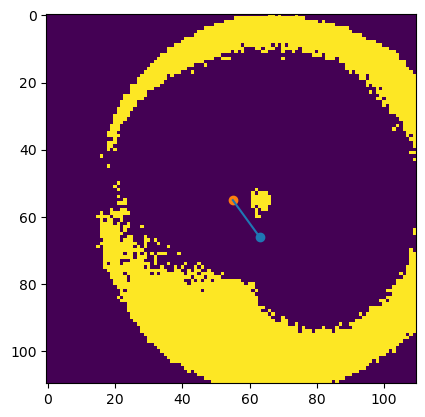

94


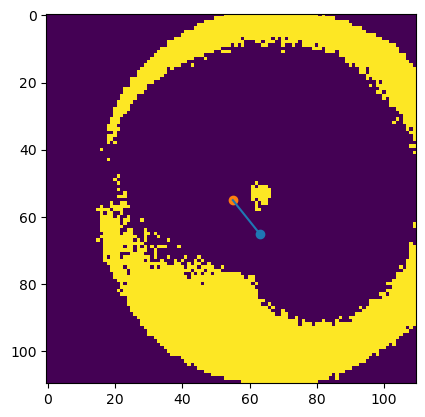

95


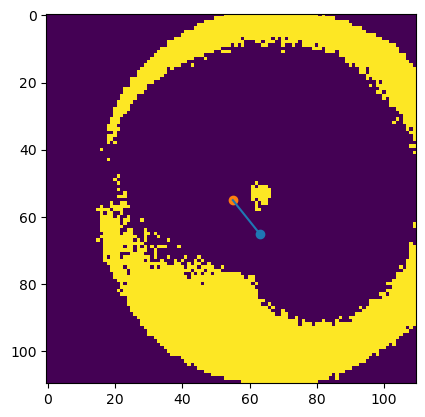

96


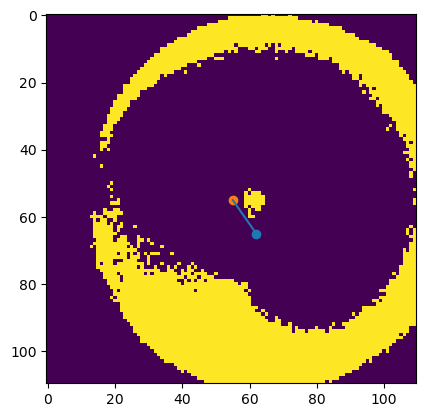

97


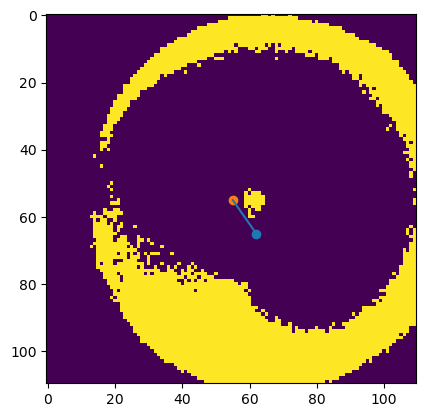

98


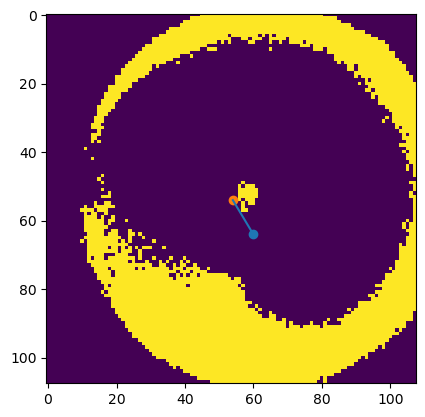

99


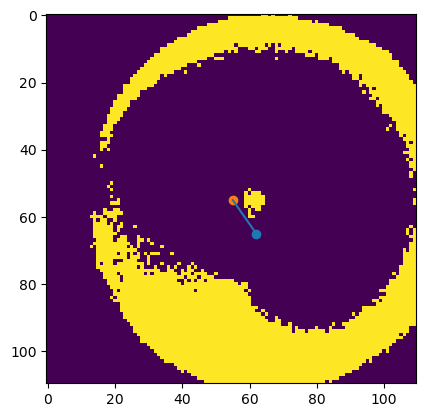

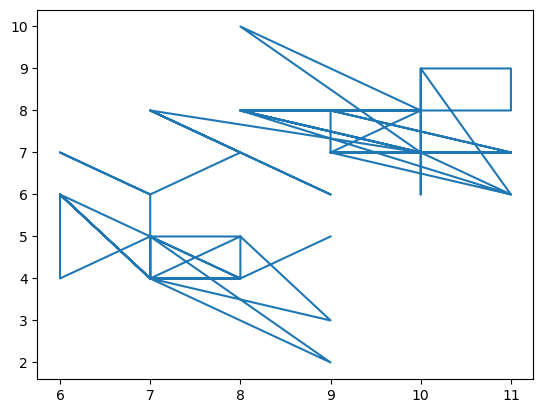

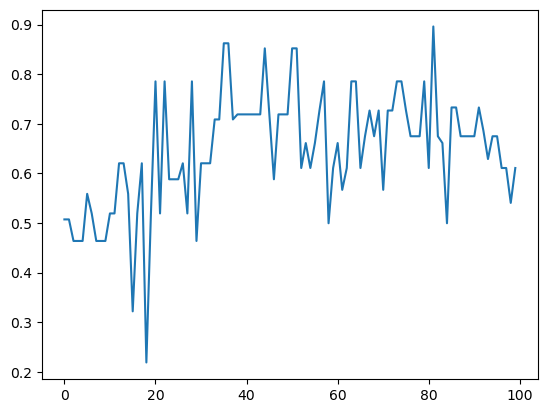

0.008730871914998328


In [93]:
for i in range(100):
    print(i)
    # Read image. 
    img = videodata[i].astype(np.uint8)

    # Convert to grayscale. 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    
    # Blur using 3 * 3 kernel. 
    gray_blurred = cv2.blur(gray, (3, 3)) 
    # Apply Hough transform on the blurred image. 
    detected_circles = cv2.HoughCircles(gray_blurred,  
                    cv2.HOUGH_GRADIENT, 1, 70, param1 = 10, 
                param2 = 30, minRadius = 30, maxRadius = 60) 

    # Draw circles that are detected. 
    if detected_circles is not None: 
        
    
        # Convert the circle parameters a, b and r to integers. 
        detected_circles = np.uint16(np.around(detected_circles)) 
        pt =  detected_circles[0, 0] 
        a, b, r = pt[0], pt[1], pt[2] 

        # Draw the circumference of the circle. 
        cv2.circle(img, (a, b), r, (0, 255, 0), 2) 

        # Draw a small circle (of radius 1) to show the center. 
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
        # plt.imshow(img)
        # plt.show()

    selected = cv2.cvtColor(videodata[0].astype(np.uint8), cv2.COLOR_BGR2GRAY) [b-r:b+r,a-r:a+r]
    # plt.imshow(cv2.cvtColor(videodata[0].astype(np.uint8), cv2.COLOR_BGR2GRAY) [b-r:b+r,a-r:a+r])
    # plt.show()

    # plt.imshow(gray[b-r:b+r,a-r:a+r] <25 )

    gamma = 25
    blacks = selected < gamma 

    blues_center = np.round(np.mean(np.argwhere(blacks),axis = 0)).astype(np.int64)
    plt.imshow(blacks)
    center = np.array([selected.shape[0],selected.shape[1]])/2
    plt.scatter(blues_center[1],blues_center[0])
    plt.scatter(center[1],center[0])
    plt.plot([center[1],blues_center[1]],[center[0],blues_center[0]])
    plt.show()

    vector = (blues_center - center)

    theta = np.arctan(vector[1]/vector[0])
    # print(f"theta = {theta}")

    np.rad2deg(theta)


    data[i] = vector

plt.plot(data[:,0],data[:,1])
plt.show()

plt.plot(np.arange(100),np.unwrap(np.angle(data[:,0] + data[:,1] * 1j)))
plt.show()

print(scipy.stats.linregress(np.arange(100),np.unwrap(np.angle(data[:,0] + data[:,1] * 1j)))[0] * 5)
